# Find restaurants with similar Clientele

In [36]:
import pandas as pd

# read Yelp data-set
path = "Yelp/table_review.csv"
path_2 = "Yelp/table_business.csv"
yelp_revs = pd.read_csv(path)
yelp_atts = pd.read_csv(path_2)

In [37]:
# choose restaurants only
yelp_atts = yelp_atts[yelp_atts['Categories'].str.contains('Restaurants',  na=False)]

In [38]:
#Change the first column's name
yelp_revs.columns = ['Business_id'] + list(yelp_revs.columns)[1:]
yelp_revs.columns

Index([u'Business_id', u'User_id', u'Stars', u'Review', u'Date', u'Funny',
       u'Useful', u'Cool'],
      dtype='object')

In [39]:
# merge the business attributes and reviews to get the business names
yelp_revs2 = pd.merge(yelp_revs[['Business_id','User_id','Review']], yelp_atts[['Business_id','Name']], on = 'Business_id')
yelp_revs2.shape

(2984624, 4)

In [40]:
yelp_revs2.head(3)

,Business_id,User_id,Review,Name
0,5UmKMjUEUNdYWqANhGckJw,PUFPaY9KxDAcGqfsorJp3Q,"Mr Hoagie is an institution. Walking in, it do...",Mr Hoagie
1,5UmKMjUEUNdYWqANhGckJw,Iu6AxdBYGR4A0wspR9BYHA,Excellent food. Superb customer service. I mis...,Mr Hoagie
2,5UmKMjUEUNdYWqANhGckJw,auESFwWvW42h6alXgFxAXQ,Yes this place is a little out dated and not o...,Mr Hoagie


In [41]:
# delete restaurants with less than 5 replications
bus_use = yelp_revs2[['Business_id','Name']]
bus_use = bus_use.drop_duplicates(['Business_id'])
print bus_use.shape
freq_rests = bus_use.Name.value_counts().reset_index(name="count").query("count > 4")['index']
bus_use = bus_use[bus_use['Name'].isin(freq_rests)]
bus_use.shape

(6140, 2)


(1872, 2)

In [42]:
# counting the remaining reviews
yelp_revs2 = yelp_revs2[yelp_revs2.Business_id.isin(bus_use.Business_id)]
yelp_revs2 = yelp_revs2[yelp_revs2.Business_id!='#NAME?'] #outlier
print yelp_revs2.shape

(44051, 4)


In [43]:
yelp_revs2.shape

(44051, 4)

In [44]:
# One-hot coding
bus_use_mat=yelp_revs2[['Business_id','User_id','Name']].pivot_table(index='Name', columns='User_id',aggfunc = 'count',fill_value=0)
bus_use_mat = bus_use_mat.iloc[:,1:]
bus_use_mat.head(2)

Business_id                         \
User_id    --4TkB_iDShmg41Y_QW9nw -07zz7Is6wVQVmnd1Xpx1Q   
Name                                                       
5 & Diner                       1                      0   
Applebee's                      0                      0   

                                                          \
User_id    -0DdjXDUionSn0AX0hv_9g -0Dxl-TDjTShfC31OHyQXw   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    -0GnCgKyRR4HkuN4YHxihw -0XKo44bg7OQIEn-fx9jFQ   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    -0itF0VWVBe3k2AdfUReGA -0sOgzetbXXnqizKaM-yUA   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    -0wUMy3vgInUD4S6KJInnw -19j4ExVKylIJU8JcEV55Q   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                    ...                                   \
User_id             ...           zy-AKMASHkjnnZo2FplEEQ   
Name                ...                                    
5 & Diner           ...                                0   
Applebee's          ...                                0   

                                                          \
User_id    zy3nt9DdlkxDyjx9rzqOIg zycqYaHhEjqIdkAYVSqQIA   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    zz4iaqRAIT-wju1J8wicgA zzK8OxsF-45t5OigBv0-tA   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    zzTleRAeW4TYJje73MZwoQ zzgZQ82lydXrHM-tI-RsWw   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                                          \
User_id    zzjawbXXqtw0SE0FlH-fbg zzmRKNph-pBHDL2qwGv9Fw   
Name                                                       
5 & Diner                       0                      0   
Applebee's                      0                      0   

                                   
User_id    zzu_HGDO-nv0gHivZrKdpQ  
Name                               
5 & Diner                       0  
Applebee's                      0  

[2 rows x 27284 columns]

In [45]:
#save the names of the restaurants and convert the pandas dataframe to numpy matrix
rest_names = bus_use_mat.index
bus_use_np = bus_use_mat.as_matrix()

In [46]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
from sklearn.preprocessing import StandardScaler
import numpy as np

# make a sparse matrix
A_sparse = sparse.csr_matrix(bus_use_np)

# calculate pairiwse similarities for the restaurants
similarities = cosine_similarity(A_sparse)

In [8]:
import sklearn.metrics.pairwise 
from numpy import genfromtxt
import matplotlib.pyplot as plt
import seaborn 
from sklearn.utils.graph import graph_laplacian
from sklearn.utils.arpack import eigsh
from sklearn.manifold.spectral_embedding_ import _set_diag
import numpy as np

#Remove single-dimensional entries
sim_yelp= np.squeeze(np.asarray(similarities))

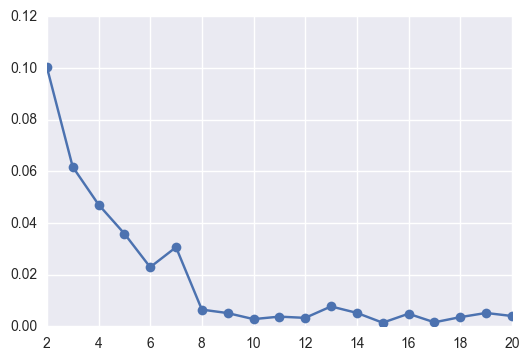

In [24]:
# calculate eigengaps for different cluster numbers
# Eigengap Heuristic method
for data in [sim_yelp]:

    %matplotlib inline
    normed_laplacian, dd = graph_laplacian(data, normed=True, return_diag=True)
    laplacian = _set_diag(normed_laplacian, 1)


    n_components = data.shape[0] - 1


    eigenvalues, eigenvectors = eigsh(-laplacian, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    eigenvalues = -eigenvalues[::-1]  # Reverse and sign inversion.

    max_gap = 0
    gap_pre_index = 0
    gaps = []
    for i in range(1, eigenvalues.size):
        gap = eigenvalues[i] - eigenvalues[i - 1]
        gaps.append(gap)
        if gap > max_gap:
            max_gap = gap
            gap_pre_index = i - 1
           
    k = gap_pre_index + 1
    plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')

In [152]:
# it looks like 3 is a good number of clusters. 
# we can now do the final clustering and assign the labesl

from sklearn import cluster
n_clusters =3
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity='precomputed',
                                          assign_labels='discretize')

spectral.fit(similarities)
y_pred = spectral.fit_predict(similarities)

In [155]:
# Save the clustering results
name_cluster.to_csv("rest_clusters5.csv", index = False)

In [153]:
# now we make a data frame with restaurant names in one columns and their cluster in another
name_cluster = pd.DataFrame(zip(rest_names, y_pred))
name_cluster.columns = ['Name','Cluster']
name_cluster.head()

,Name,Cluster
0,5 & Diner,0
1,Applebee's,0
2,Arby's,2
3,Baja Fresh Mexican Grill,0
4,Barro's Pizza,0


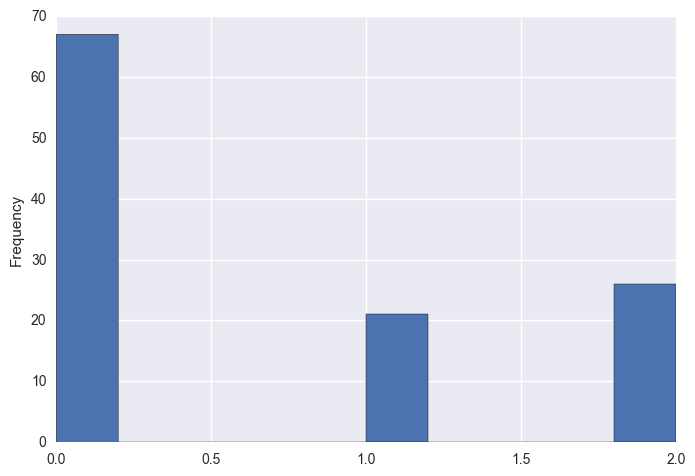

In [154]:
# check restaurant count in every cluster
# it looks like that data-set is balances in terms of restaurants per cluster
name_cluster['Cluster'].plot.hist()

In [46]:
name_cluster.shape

(114, 2)

# Characterizing the resulting clusters using Word2Vec

In [47]:
from sklearn import preprocessing
import warnings
import string
import gensim, logging
from gensim import models
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
warnings.filterwarnings('ignore')

C:\Users\sur216\Anaconda2\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [157]:
# read the clusters table
path3 = "rest_clusters5.csv"
yelp_clusters = pd.read_csv(path3)

In [49]:
# store reviews in a list
coms = yelp_revs['Review'].tolist()

# remove punctuations from teh comments
# and convert every comment to a list of words
w2v_lst = [[j.translate(None, string.punctuation) for j in str(i).split(" ") if not j == ''] for i in coms]

In [107]:
# NOTE: THIS BLOCK MAY TAKE MORE THAN AN HOUR TO RUN
# Print top 100 frequent words

# flatten the list
words_list = [i for j in w2v_lst for i in j]

# remove common and useless words
filtered_words = [word for word in words_list if word not in stopwords.words('english')]

# count every word, sort and print the top 100 words
count_dict=Counter(filtered_words )
print dict(sorted(count_dict.iteritems(), key=itemgetter(1), reverse=True)[:300])

{'': 356312, 'atmosphere': 38117, 'selection': 40605, 'super': 35149, 'looked': 33125, 'show': 43961, 'money': 35683, 'half': 33094, 'hot': 44991, 'years': 59053, 'course': 31897, 'isnt': 29291, 'rooms': 30202, 'go': 204163, 'chicken': 79068, 'still': 74693, 'find': 67253, 'staff': 96675, 'perfect': 35390, '1': 29207, 'We': 206240, 'busy': 31685, 'dining': 28270, 'menu': 82760, 'fried': 31554, 'enough': 50308, 'actually': 42477, 'better': 91250, 'going': 93425, 'location': 56671, 'pretty': 103843, 'Not': 46222, 'pay': 35102, 'rice': 33235, 'sauce': 60533, 'friendly': 85665, 'outside': 34060, 'customer': 40886, 'coffee': 30783, 'good': 364717, 'around': 79860, 'get': 266708, 'food': 349573, 'big': 51568, 'couple': 34261, 'She': 41633, 'lunch': 61458, 'every': 61009, 'know': 96109, 'new': 57413, 'front': 38534, '2': 70034, 'bit': 63902, 'items': 31170, 'day': 76403, 'special': 41075, 'bread': 40655, 'bar': 79967, 'like': 288096, 'always': 125526, 'cool': 29025, 'manager': 28529, 'sandwic

In [88]:
# NOTE: THIS BLOCK MIGHT TAKE MORE THAN 30 HOURS TO RUN!!!
# ignore words with less than 10 replications in the entire corpus
# produce 100 dimensional vector representation for every word in the corpus 
model = gensim.models.Word2Vec(w2v_lst, min_count=10, size = 100)
model.save('yelp2vec')

In [89]:
# load the model
model = gensim.models.Word2Vec.load('yelp2vec') 

In [90]:
# test the model
print model.most_similar(positive=['salmon'],topn=10)

[('tuna', 0.8935225009918213), ('trout', 0.856014609336853), ('scallop', 0.8378416299819946), ('whitefish', 0.8304678201675415), ('Salmon', 0.8122285008430481), ('halibut', 0.8107125759124756), ('ahi', 0.7933156490325928), ('swordfish', 0.7883926033973694), ('mackerel', 0.783542811870575), ('octopus', 0.7698493599891663)]


In [7]:
# Generate new features based on the frequent words and Word2Vec results
# Feature engineering

meat_types = ['chicken','meat','beef','pork','lamb','veal','duck','turkey']
vegie_types = ['turnip','lettuce','celery','seaweed','parsley','scallion','eggplant','broccoli','zucchini','kale','cilantro',
               'veggie','caesar', 'cabbage', 'cucumber','basil','vegetable', 'mushroom','sprout', 'carrot','asparag', 'bean',
               'onion',  'tomato', 'coleslaw','avocado','spinach','artichoke']
hardliq_types = ['tequilla','whiskey','vodka','martini','bourbon','shot']
softliq_types = ['champagne','beer','wine','margarita','sangria','mimosa','cider']
sweets_types = ['yogurt', 'gelato', 'pudding','cupcake','biscuit','pie','tiramisu', 'crepe','custard',
                'tart','sorbet', 'nutella','cheesecake','cream', 'cannoli','muffin', 'donut','cookie','cake','shake']
fast_food = ['pizza','hotdog','hot dog','sandwich','burger','chips','pepperoni','mac', 'finger','cheeseburger','cheesesteak',
            'calzone','meatball','hoagy','poutine','blt','reuben','wing']

latin_types = ['salsa','burrito', 'quesadilla','taco','carnitas','tamal','guac', 'tapa','enchilada','tortilla','fajita',
                 'carne', 'jalapeno','nacho','ceviche','empanada']
italian_types = ['pastrami','panini','lasagna', 'bruschetti','pasta','bruschetta','prosciutto',
                 'stromboli','vermicelli','risotto','spaghetti','pesto','chorizo','gnocchi']
asian_types = ['fusion','sesame','wonton','springroll','omakas','sushi', 'raman','tofu',
               'kimchi','nigiri','sashimi','mushi','noodle','teryaki']
soda_types = ['pepsi','fanta','spirit','coke', 'soda']
seafood_types = ['flounder','halloumi','haddock','catfish','halibut','crayfish','whitefish','cod','tilapia','fish', 'shrimp',
               'pompano','mahi','walleye','snapper','monkfish','pollack','marlin','swordfish','mackerel','pickerel','mussel',
               'salmon', 'seafood', 'lobster','crab','tuna','calamari','clam','oyster','octopu','scallop', 'squid' ]
ethnic_food = ['thai','chinese','mexican','italian','asian','indian','japanese','vietnamese','hawaiian','sicilian','arabic',
              'middleeastern','korean','taiwanese','persian','greek','lebanese','portuguese','ethiopian','spanish']

all_features = meat_types+vegie_types+hardliq_types+softliq_types\
+sweets_types+fast_food+latin_types+italian_types+asian_types\
+soda_types+seafood_types+ethnic_food

In [12]:
# For every business, count the number of words in "all_features" in the rewvies
yelp_revs['Review'] = yelp_revs['Review'].str.lower()
yelp_feats = yelp_revs[['Business_id']]
for i in all_features:    
    yelp_feats[i] = yelp_revs.Review.str.count(i)
yelp_feats.head()

C:\Users\sur216\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Business_id,chicken,meat,beef,pork,lamb,veal,duck,turkey,turnip,...,arabic,middleeastern,korean,taiwanese,persian,greek,lebanese,portuguese,ethiopian,spanish
0,5UmKMjUEUNdYWqANhGckJw,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,__CQhr0M-OpKdu0DXgGcaQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,__CQhr0M-OpKdu0DXgGcaQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,__CQhr0M-OpKdu0DXgGcaQ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,__tK5Q1SLIatywquMCqCAQ,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
yelp_feats.shape

(713446, 190)

In [158]:
#add the generated features to the feature table
gen_feat_names = ['meat_types','vegie_types','hardliq_types','softliq_types','sweets_types','fast_food','latin_types',
                  'italian_types','asian_types','soda_types','seafood_types','ethnic_food']
gen_features = [meat_types,vegie_types,hardliq_types,softliq_types,sweets_types,fast_food,latin_types,
                  italian_types,asian_types,soda_types,seafood_types,ethnic_food]
for n,i in enumerate(gen_features):
    yelp_feats[gen_feat_names[n]] = yelp_feats[i].sum(axis=1)  

In [202]:
len(all_features)

189

In [159]:
#getting the names from business attribute table and attach it to the yelp_feats table
yelp_feats = yelp_feats.merge(yelp_atts[['Business_id','Name']], on = "Business_id")


In [160]:
#getting the cluster labels and attach it to the yelp_feats table
yelp_feats = yelp_feats.merge(yelp_clusters, on = "Name")

In [167]:
# group by the yelp features (i.e. word counts) by cluster
food_cluster = yelp_feats.groupby("Cluster").mean()

# select only the features that were generated
df = food_cluster[gen_feat_names]

normalized_food_cluster = pd.DataFrame()
# normalize the features
for i in gen_feat_names: 
    normalized_food_cluster[i] = (df[i]-df[i].min())/(df[i].max()-df[i].min())
normalized_food_cluster

,meat_types,vegie_types,hardliq_types,softliq_types,sweets_types,fast_food,latin_types,italian_types,asian_types,soda_types,seafood_types,ethnic_food
Cluster,,,,,,,,,,,,
0,1.000000,1.000000,0.000000,0.336019,0.41576,0.359059,1.00000,0.991885,1.000000,0.000000,1.000000,1.000000
1,0.898167,0.000000,0.059089,0.000000,1.00000,1.000000,0.00000,1.000000,0.000000,0.944017,0.000000,0.000000
2,0.000000,0.580992,1.000000,1.000000,0.00000,0.000000,0.13815,0.000000,0.209864,1.000000,0.160765,0.832589


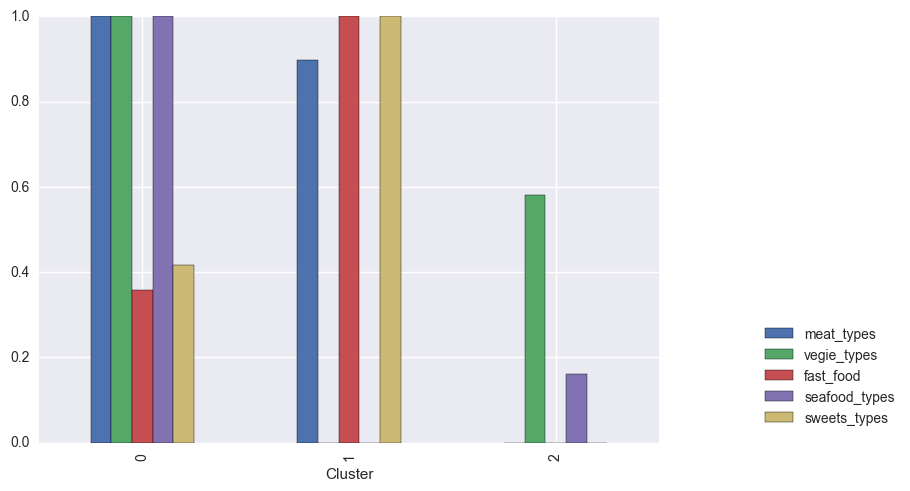

In [162]:
normalized_food_cluster[['meat_types','vegie_types', 'fast_food','seafood_types', 'sweets_types']].plot.bar().legend(bbox_to_anchor=(1.4, 0.3))

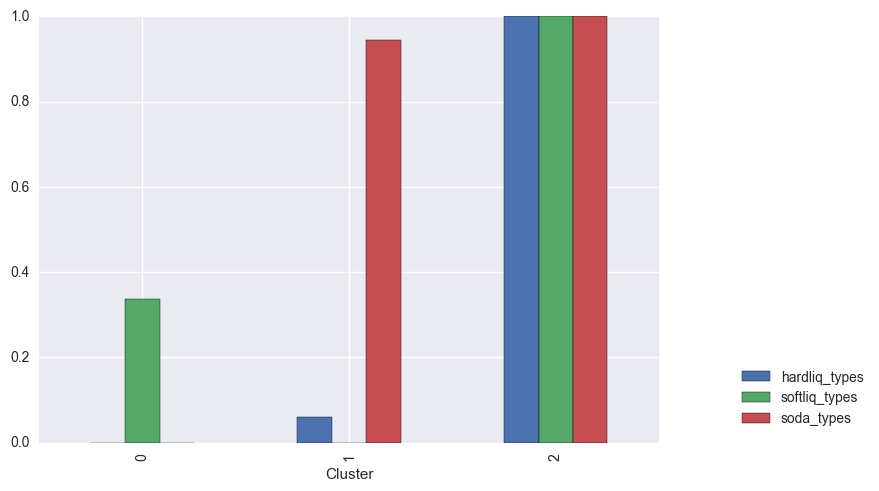

In [163]:
normalized_food_cluster[['hardliq_types','softliq_types','soda_types']].plot.bar().legend(bbox_to_anchor=(1.35, 0.2))

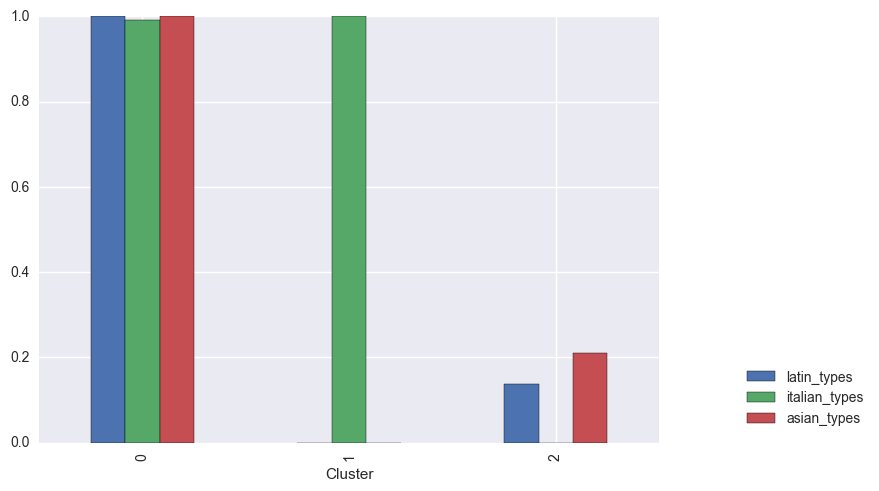

In [164]:
normalized_food_cluster[['latin_types','italian_types','asian_types']].plot.bar().legend(bbox_to_anchor=(1.35, 0.2))

In [168]:
#get the name counts for all restaurants
name_count = yelp_atts.groupby("Name").count()
name_count.reset_index(inplace=True)
name_count = name_count.iloc[:,[0,1]]
name_count.columns = ['Name','Count']


# merge the yelp_clusters with name counts
yelp_clusters = yelp_clusters.merge(name_count, on = "Name")


def get_rest(cluster, count):
    
    ''' This finction gets a list of clusters and retuns
     a dataframe showing "count" restaurant names from each cluster'''
    a = yelp_clusters[yelp_clusters.Cluster==cluster]
    a = a.sort(['Count'], ascending=False).head(count)
    a = a[['Name','Count']]
    name = "Names_"+"cluster_"+str(cluster)
    cnt = "Count_"+str(cluster)
    a.columns = [name,cnt]
    return a.reset_index()[[i for i in list(a.columns) if not i=="index"]]

pd.concat([get_rest(0,10),get_rest(1,10),get_rest(2,10)], axis= 1)

,Names_cluster_0,Count_0,Names_cluster_1,Count_1,Names_cluster_2,Count_2
0,Subway,364,Pizza Hut,155,McDonald's,345
1,Taco Bell,180,Wendy's,144,Burger King,147
2,Panda Express,119,Jimmy John's,95,Domino's Pizza,97
3,Chipotle Mexican Grill,95,KFC,93,Papa John's Pizza,84
4,Jack in the Box,79,Roberto's Taco Shop,44,Arby's,63
5,Denny's,77,Panera Bread,44,Chick-fil-A,55
6,Sonic Drive-In,67,PT's,33,Jersey Mike's Subs,47
7,Del Taco,60,Olive Garden Italian Restaurant,30,Quiznos,32
8,Applebee's,50,Culver's,25,Qdoba Mexican Grill,30
9,Port of Subs,46,Fatburger,22,Chili's Grill & Bar,29


# Finalizing the independent variables

In [9]:
import numpy as np

# read the demography and landuse table and drop NA values. 
all_joined = pd.read_csv("Independent variables/independent_variables.csv", keep_default_na=False)
all_joined.ZIP = all_joined.ZIP.apply(pd.to_numeric, errors='coerce')
all_joined.ZIP = all_joined.ZIP.apply(lambda x:'%05d' % x) # convert zip codes to standard 5 digits format
all_joined['median_income'] = all_joined.median_income.apply(lambda x: np.nan if x=="(X)" else x)

# read yellow pages data
path2 = "YellowPages/yellowpages_zipcode_maindata.csv"
yellow_zip = pd.read_csv(path2)

del all_joined['Unnamed: 0']
all_joined.dropna(how = 'any').head()

,ZIP,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,...,Other Race,Male Pop,Female Pop,sixty_plus,below_eighteen,eighteen_to_sixty,household_size,non_family,median_income,education
1,00602,6.0,2.0,0.0,1.0,0.0,0.0,0.0,17.0,0.0,...,1545.0,19790.0,20470.0,8776.680,8615.640,22867.680,3.1,3207.0,13772,8615.640
2,00603,1.0,2.0,0.0,3.0,0.0,0.0,0.0,3.0,0.0,...,5642.0,25675.0,26733.0,12892.368,11320.128,28195.504,2.71,5252.0,15985,12053.840
3,00606,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,1655.0,3152.0,3179.0,1589.081,1430.806,3311.113,3.29,551.0,13314,677.417
4,00612,2.0,6.0,0.0,5.0,5.0,1.0,1.0,14.0,0.0,...,4792.0,30776.0,34040.0,15879.920,14453.968,34482.112,2.79,6281.0,18526,16009.552
5,00623,2.0,1.0,0.0,0.0,1.0,1.0,0.0,12.0,0.0,...,8669.0,20598.0,22357.0,10609.885,9235.325,23109.790,2.94,4471.0,18163,10910.570


In [10]:
# list of independent variables 
print list(all_joined.columns)

['ZIP', 'churches', 'colleges', 'govOffices', 'hospitals', 'libraries', 'museums', 'recAreas', 'schools', 'shoppingCenters', 'Total Pop', 'White', 'Black', 'Asian', 'Other Race', 'Male Pop', 'Female Pop', 'sixty_plus', 'below_eighteen', 'eighteen_to_sixty', 'household_size', 'non_family', 'median_income', 'education']


In [11]:
# join the zip code area from the yellow pages to the all_joined table
zip_area = yellow_zip[['ZCTA5CE10','ALAND10']]
zip_area.columns = ["ZIP","area"]
zip_area = zip_area.dropna()
zip_area = zip_area.drop_duplicates()
zip_area.ZIP = zip_area.ZIP.apply(pd.to_numeric, errors='coerce')
zip_area.ZIP = zip_area.ZIP.apply(lambda x:'%05d' % x) # convert zip codes to standard 5 digits format
all_joined = all_joined.merge(zip_area, on = 'ZIP')

In [12]:
all_joined.head()

,ZIP,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,...,Male Pop,Female Pop,sixty_plus,below_eighteen,eighteen_to_sixty,household_size,non_family,median_income,education,area
0,01001,7.0,0.0,7.0,0.0,1.0,1.0,1.0,7.0,0.0,...,8213.0,9225.0,4533.880,3330.658,9573.462,2.37,3023.0,44061,4882.640,29731610
1,01002,10.0,3.0,7.0,0.0,4.0,7.0,6.0,14.0,0.0,...,14639.0,15141.0,4467.000,3603.380,21709.620,2.58,4860.0,41108,20250.400,142617829
2,01003,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,5453.0,5788.0,11.241,112.410,11117.349,3.76,17.0,NaN,2754.045,1842386
3,01005,3.0,0.0,1.0,0.0,1.0,0.0,2.0,5.0,0.0,...,2750.0,2451.0,1159.823,1258.642,2782.535,2.77,655.0,41988,1248.240,114637908
4,01007,3.0,0.0,4.0,0.0,1.0,1.0,1.0,6.0,0.0,...,7307.0,7531.0,2908.248,3620.472,8309.280,2.59,1673.0,NaN,6231.960,136236049


In [13]:
all_joined.shape

(25959, 25)

In [14]:
#normalize all the variables except ['ZIP','area','Total Pop','Male Pop','Female Pop','median_income']
# on population
norm_lst = [i for i in list(all_joined.columns) if not i in ['ZIP','area','Total Pop','Male Pop','Female Pop','median_income']]
print norm_lst
for i in norm_lst:
    print i
    all_joined[i] = all_joined[i].apply(pd.to_numeric, errors='coerce')
    all_joined[i] = all_joined[i].apply(lambda x: np.round(x, decimals=2))
    all_joined[i] = all_joined[i]*100/(all_joined['Total Pop']+1)

['churches', 'colleges', 'govOffices', 'hospitals', 'libraries', 'museums', 'recAreas', 'schools', 'shoppingCenters', 'White', 'Black', 'Asian', 'Other Race', 'sixty_plus', 'below_eighteen', 'eighteen_to_sixty', 'household_size', 'non_family', 'education']
churches
colleges
govOffices
hospitals
libraries
museums
recAreas
schools
shoppingCenters
White
Black
Asian
Other Race
sixty_plus
below_eighteen
eighteen_to_sixty
household_size
non_family
education


In [15]:
all_joined['Total Pop'] = all_joined['Total Pop'].apply(pd.to_numeric, errors='coerce')

#calculate population density 
all_joined['pop_density'] = all_joined['Total Pop']*100/(all_joined['area']+1) 

# calculate sex_ratio
all_joined['sex_ratio'] = all_joined['Male Pop']/(all_joined['Female Pop']+1)

In [16]:
# remove unnecessary columns that we are not going to use in the final model
columns = ['Total Pop','Male Pop','Female Pop','area']
all_joined.drop(columns, axis=1, inplace = True)
all_joined = all_joined.drop_duplicates()
all_joined.head()

,ZIP,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,...,Other Race,sixty_plus,below_eighteen,eighteen_to_sixty,household_size,non_family,median_income,education,pop_density,sex_ratio
0,01001,0.040140,0.000000,0.040140,0.000000,0.005734,0.005734,0.005734,0.040140,0.0,...,1.754688,25.998509,19.098916,54.896840,0.013590,17.334710,44061,27.998394,0.058651,0.890202
1,01002,0.033578,0.010074,0.023505,0.000000,0.013431,0.023505,0.020147,0.047010,0.0,...,0.621201,14.999496,12.099594,72.897552,0.008663,16.319130,41108,67.997717,0.020881,0.966781
2,01003,0.008895,0.008895,0.000000,0.008895,0.000000,0.000000,0.000000,0.008895,0.0,...,0.987369,0.099982,0.999911,98.891212,0.033446,0.151219,NaN,24.497776,0.610132,0.941959
3,01005,0.057670,0.000000,0.019223,0.000000,0.019223,0.000000,0.038447,0.096117,0.0,...,0.038447,22.295656,24.195309,53.489812,0.053249,12.591311,41988,23.995386,0.004537,1.121533
4,01007,0.020217,0.000000,0.026956,0.000000,0.006739,0.006739,0.006739,0.040434,0.0,...,0.350428,19.598693,24.398342,55.996226,0.017454,11.274345,NaN,41.997170,0.010891,0.970127


In [17]:
all_joined.iloc[:,1:].describe()

C:\Users\sur216\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,White,...,Asian,Other Race,sixty_plus,below_eighteen,eighteen_to_sixty,household_size,non_family,education,pop_density,sex_ratio
count,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,...,25959.000000,25959.000000,25959.000000,25959.000000,25959.000000,25829.000000,25959.000000,25959.000000,2.595900e+04,25959.000000
mean,0.145359,0.004231,0.037559,0.008543,0.012448,0.013488,0.012334,0.107471,0.001724,83.407395,...,2.329102,2.407026,23.665062,21.986219,54.263964,0.183158,13.001267,24.327613,5.801908e-02,1.117399
std,0.253867,0.022780,0.312924,0.043876,0.046766,0.088125,0.431411,0.363657,0.050109,19.558044,...,5.435403,5.427174,9.543713,6.445954,8.320249,0.631737,6.829884,15.955295,2.063706e-01,10.311993
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002165,0.000000,0.000000,3.060595e-07,0.000000
25%,0.011713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019820,0.000000,77.304548,...,0.000000,0.000000,18.198835,18.998555,50.490012,NaN,9.200856,13.393358,1.108303e-03,0.918560
50%,0.065601,0.000000,0.010936,0.000000,0.000000,0.000000,0.000000,0.048146,0.000000,91.352768,...,0.516283,0.511308,22.554000,22.398558,54.194922,NaN,12.095698,19.499603,4.311348e-03,0.978796
75%,0.181895,0.000000,0.040525,0.002968,0.010763,0.008903,0.007685,0.095534,0.000000,96.810720,...,2.102482,2.237428,27.389830,25.599488,57.697273,NaN,15.372876,30.899160,3.835980e-02,1.054017
max,7.777778,1.098901,47.058824,3.125000,4.000000,7.692308,69.230769,17.333333,7.692308,99.987078,...,86.238532,94.117647,99.818182,85.341463,99.973205,47.058824,99.218750,99.975388,5.778294e+00,1644.000000


# Finalizing the response variables

In [18]:
# read yellow pages data
path2 = "YellowPages/yellowpages_zipcode_maindata.csv"
yellow_zip = pd.read_csv(path2)

# remove those restaurants with zip codes = NA
yellow_zip = yellow_zip[np.isfinite(yellow_zip['ZCTA5CE10'])]

# convert zip codes to standard 5 digits format
yellow_zip['ZCTA5CE10'] = yellow_zip['ZCTA5CE10'].astype(int).apply(lambda x:'%05d' % x) 
yellow_zip.head()

,FID_1,OBJECTID_1,OBJECTID_x,Field1,ID,Name,Category,City,State,Zip_Code,...,NEAR_FID,OBJECTID_y,Cnt_Name,chainness,FID_2,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10
0,80,1065,8357,8357,560495,Subway,Fast Food Restaurants,Newport,OR,0,...,9579,367343,21408,1.0,25,97365,8600000US97365,97365.0,109806917,6824094
1,82,1142,8434,8434,36658,Subway,Fast Food Restaurants,Newport,OR,0,...,9579,367343,21408,1.0,25,97365,8600000US97365,97365.0,109806917,6824094
2,480,24040,31336,31336,433711,Subway,Restaurants,Seattle,WA,0,...,0,367343,21408,1.0,42,98146,8600000US98146,98146.0,12047560,1758214
3,502,25635,32931,32931,83092,Subway,Sandwich Shops,Burien,WA,0,...,0,367343,21408,1.0,42,98146,8600000US98146,98146.0,12047560,1758214
4,328,13575,20871,20871,136388,Subway,Fast Food Restaurants,Yreka,CA,96097,...,0,367343,21408,1.0,75,96097,8600000US96097,96097.0,493972005,1024780


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

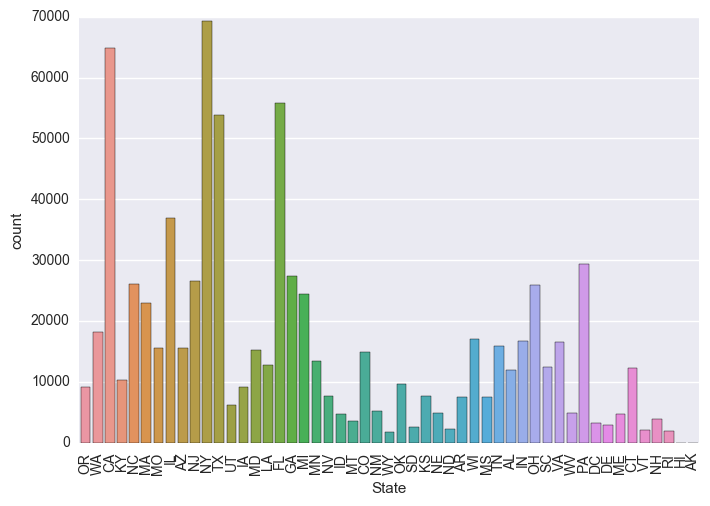

In [173]:
import seaborn as sns

sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
g = sns.countplot(x="State", data=yellow_zip);
plt.xticks(rotation=90)

In [25]:
# merge the Yellow Pages data set with the clusters we found in Yelp data-set 
# the two data sets have the "Name" column in common 
# we will first make sure that the "Name" column in both data-setsis lower case
name_cluster = pd.read_csv("rest_clusters5.csv")
name_cluster["Name"] = name_cluster["Name"].apply(lambda x:x.lower())
yellow_zip["Name"] = yellow_zip["Name"].apply(lambda x:x.lower())
yellow_zip = yellow_zip.merge(name_cluster, on = "Name")
print yellow_zip.shape

(133561, 28)


In [26]:
# there are 104 unique restaurants now
yellow_zip.Name.unique().shape

(104L,)

In [27]:
# group by zip codeand cluster

rest_count_clnt = yellow_zip.groupby(["ZCTA5CE10","Cluster"]).count()
rest_count_clnt = rest_count_clnt.iloc[:,[0]]
rest_count_clnt.reset_index(inplace = True)
rest_count_clnt.columns = ['ZIP','cluster','count']
rest_count_clnt.head()

,ZIP,cluster,count
0,01001,0,2
1,01001,2,2
2,01002,0,3
3,01005,0,1
4,01007,0,1


In [28]:
# calculate the total count of restaurants per zip code
rest_cnt = yellow_zip.groupby(["ZCTA5CE10"]).count()
rest_cnt.reset_index(inplace = True)
rest_cnt = rest_cnt.iloc[:,[0,1]]
rest_cnt.columns = ['ZIP',"Total_cnt"]


# merging the total counts with the previous table
rest_count_clnt = rest_count_clnt.merge(rest_cnt, on = "ZIP")
rest_count_clnt =rest_count_clnt[rest_count_clnt['Total_cnt']>9]

# we can now see the total count of restaurants per zip code
# and the count of specific clusters per zip code

rest_count_clnt.head()

,ZIP,cluster,count,Total_cnt
10,01020,0,10,21
11,01020,1,3,21
12,01020,2,8,21
20,01035,0,7,12
21,01035,1,2,12


In [29]:
# we can now calculate the proportion of each cluster per zip code
# in the first row for example, 19 percent of restaurants in zipcode 01020 are in cluster 0
rest_count_clnt['cclst_proportion'] = rest_count_clnt['count']/rest_count_clnt.Total_cnt
rest_count_clnt.head()

,ZIP,cluster,count,Total_cnt,cclst_proportion
10,01020,0,10,21,0.476190
11,01020,1,3,21,0.142857
12,01020,2,8,21,0.380952
20,01035,0,7,12,0.583333
21,01035,1,2,12,0.166667


In [30]:
# if we pivot the table above, for every zip code, we can see 
# what are the proportions of the four clusters

respose_variables= rest_count_clnt.pivot(index='ZIP', columns='cluster', values='cclst_proportion').fillna(0)
respose_variables.reset_index(inplace = True)
respose_variables.columns = ['ZIP',"Cluster0","Cluster1","Cluster2"]

respose_variables.head()

,ZIP,Cluster0,Cluster1,Cluster2
0,01020,0.476190,0.142857,0.380952
1,01035,0.583333,0.166667,0.250000
2,01040,0.608696,0.130435,0.260870
3,01060,0.500000,0.200000,0.300000
4,01085,0.625000,0.125000,0.250000


In [31]:
# merge independent and response variables on zip code
all_vars = all_joined.merge(respose_variables, on = "ZIP")
all_vars.head()

,ZIP,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,...,eighteen_to_sixty,household_size,non_family,median_income,education,pop_density,sex_ratio,Cluster0,Cluster1,Cluster2
0,01020,0.045230,0.000000,0.035538,0.003231,0.006461,0.000000,0.003231,0.041999,0.000000,...,56.598165,0.007948,15.003392,40536,17.399444,0.095805,0.999419,0.476190,0.142857,0.380952
1,01035,0.075117,0.000000,0.056338,0.000000,0.000000,0.037559,0.000000,0.037559,0.037559,...,50.990423,0.042254,17.953052,40390,46.391362,0.008905,0.718296,0.583333,0.166667,0.250000
2,01040,0.042139,0.002479,0.037181,0.007436,0.002479,0.022309,0.009915,0.064447,0.004957,...,56.698585,0.006321,13.905758,32230,23.399425,0.073257,0.942462,0.608696,0.130435,0.260870
3,01060,0.039396,0.013132,0.111622,0.006566,0.019698,0.065660,0.006566,0.118188,0.000000,...,66.195666,0.013132,26.139199,NaN,60.296060,0.053852,0.692410,0.500000,0.200000,0.300000
4,01085,0.036136,0.002409,0.028909,0.004818,0.009636,0.002409,0.007227,0.060226,0.002409,...,58.298603,0.006191,12.503011,41180,32.699205,0.026843,0.952585,0.625000,0.125000,0.250000


# Finding associations between variables

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import silhouette_score 
from sklearn.feature_selection import SelectKBest
from pandas import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
import seaborn as sns

In [188]:
variables = all_vars.dropna(how='any')
print variables.shape
X = variables.loc[:,[i for i in variables.columns if not i in ["ZIP","Cluster0","Cluster1","Cluster2","Cluster3"]]]
Y = variables.loc[:,["Cluster0","Cluster1","Cluster2"]]

(3625, 26)


In [192]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)
variables['group_2'] = map(int, kmeans.labels_)

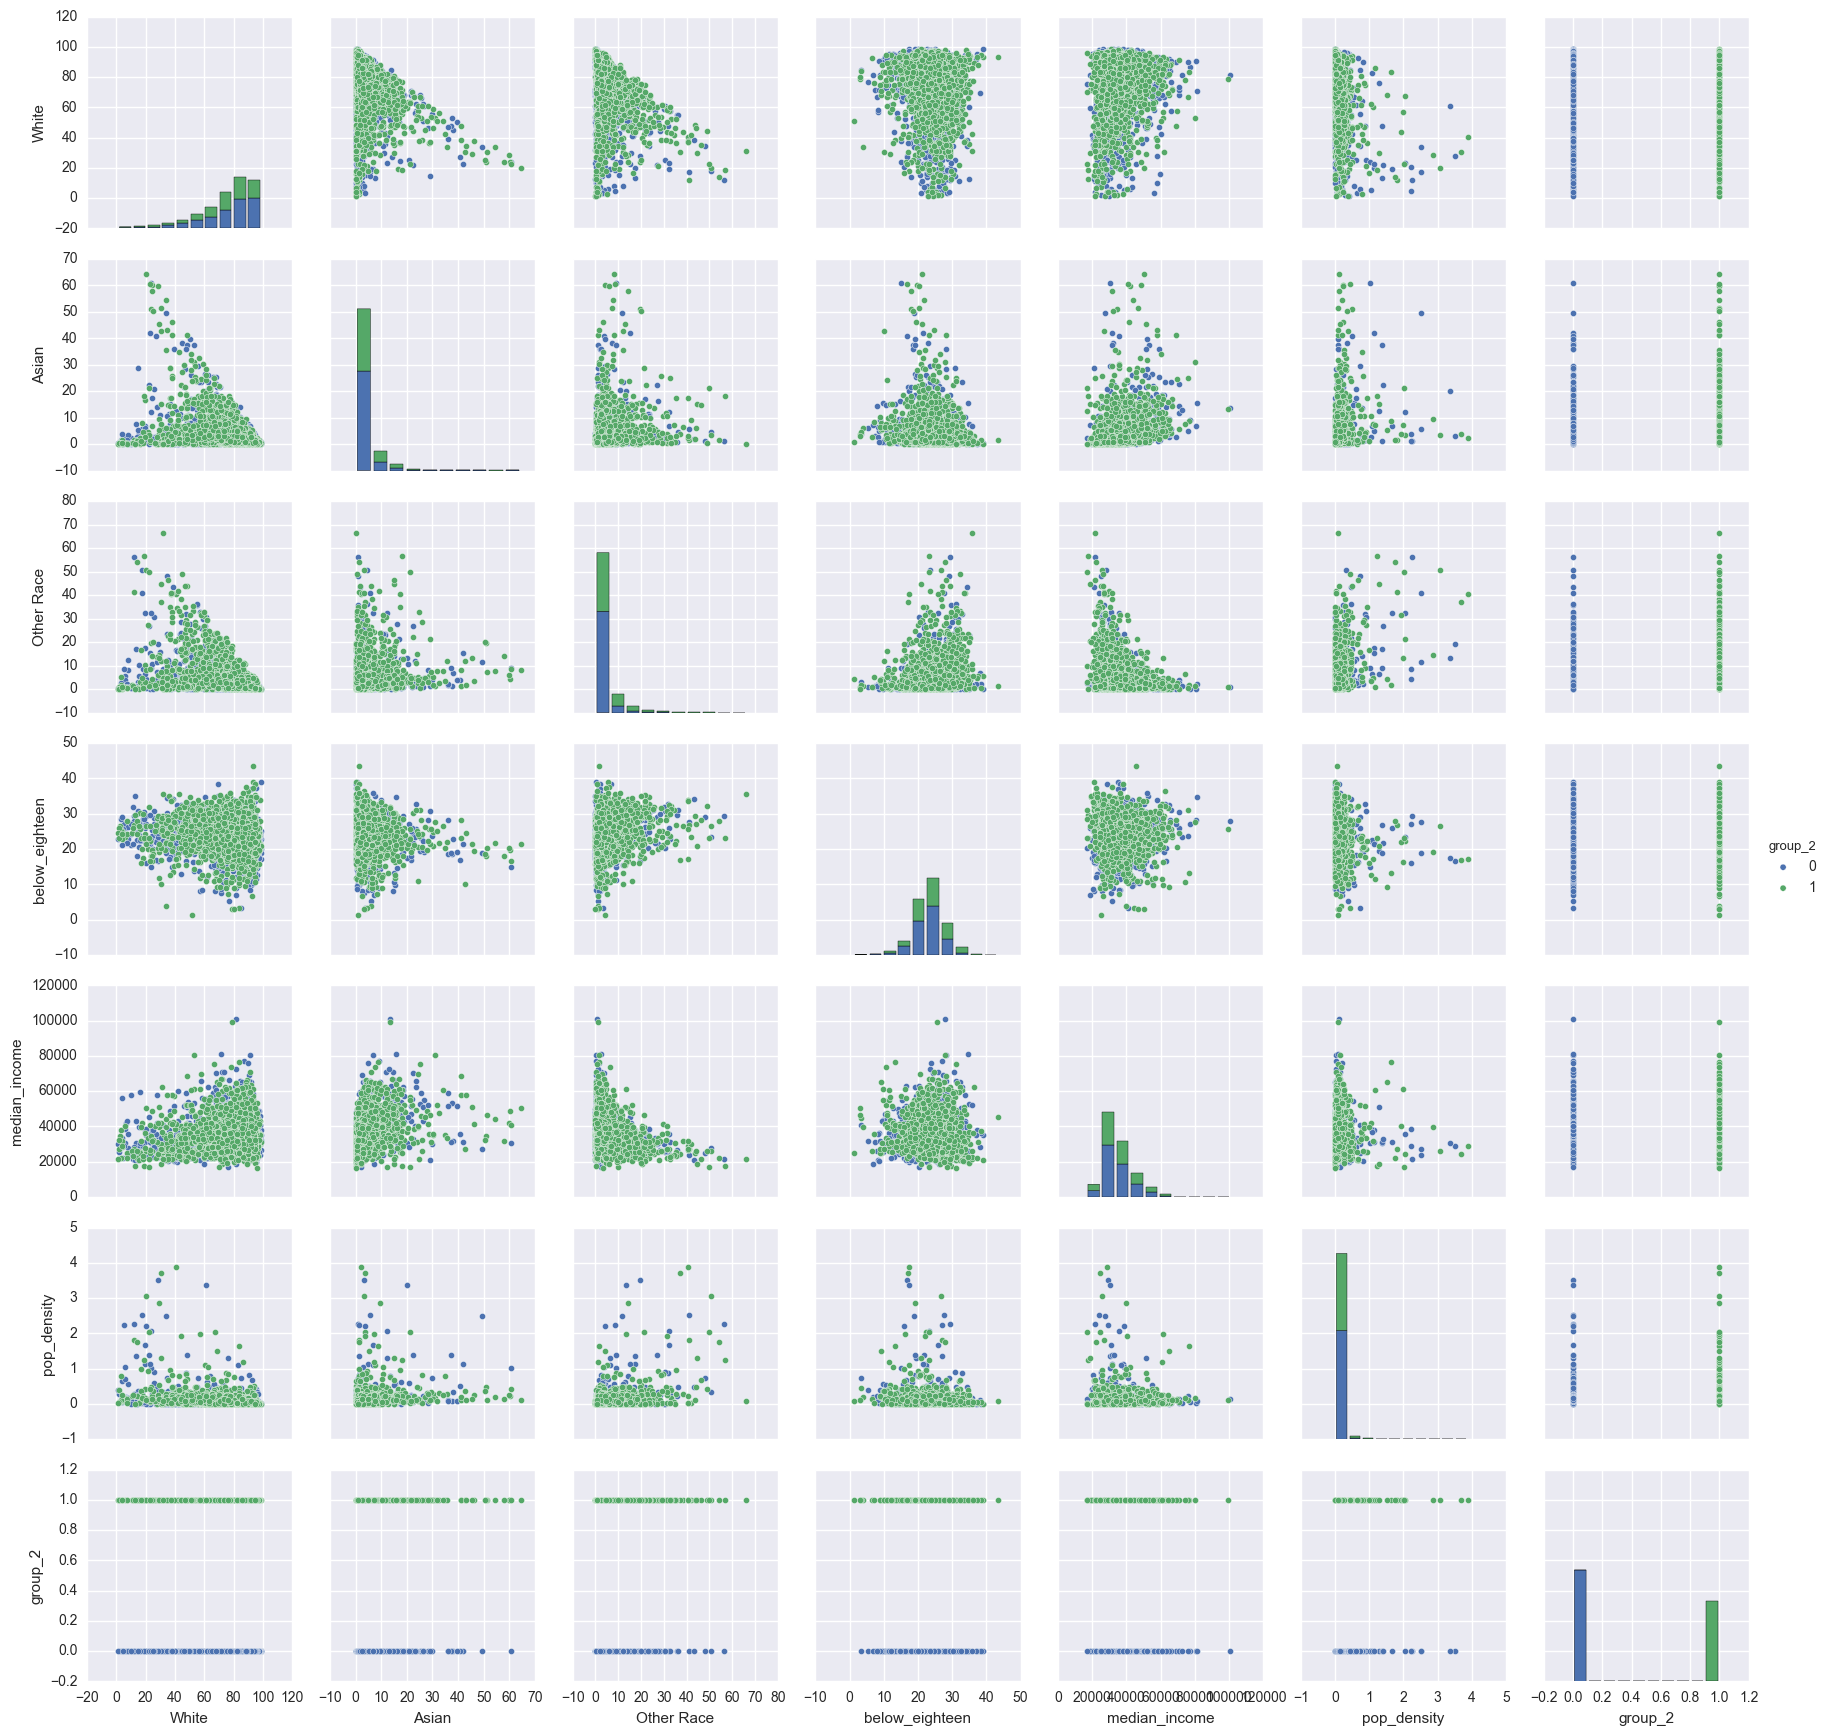

In [193]:
#pairplot for some variables
list_of_vars = ['White', 'Asian', 'Other Race', 'below_eighteen', 'median_income', 'pop_density', 'group_2']
df = variables[list_of_vars]
for i in list_of_vars: 
    if not i == "group_2":df[i]= pd.to_numeric(df[i])
sns.pairplot(df, hue = "group_2")

In [194]:
# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify = variables[['group_2']], test_size = 0.2, random_state=0)

In [51]:
# define the performance metric
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    score =r2_score(y_true, y_predict) 
    # Return the score
    return score

In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# create dictionaries of different parameters for our models
par_lin = {'fit_intercept':[True,False],'normalize':[True,False]}
par_laso = {'alpha':[0,0.1,0.2,0.5,1], 'fit_intercept':[True,False], 'normalize':[True,False]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11)}

# creating a model-parameter dictionary
model_par_reg ={'linear_model.LinearRegression()':par_lin,
          'linear_model.Lasso()':par_laso,
          'DecisionTreeRegressor()':par_tree,
           'RandomForestRegressor()':par_forest}

def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    #Create a regressor
    model = eval(model)
    
    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, Y)

    # Return the optimal model after fitting the data
    return grid

best_models = {}
for m in model_par_reg: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_reg)
    best_models.update({m:best_model.best_estimator_})
    print "R-square:",best_model.best_score_
    print "Best parameters",best_model.best_params_

linear_model.Lasso()
R-square: 0.129176423837
Best parameters {'normalize': False, 'alpha': 0, 'fit_intercept': True}
RandomForestRegressor()
R-square: 0.167458507944
Best parameters {'n_estimators': 100, 'max_depth': 8}
linear_model.LinearRegression()
R-square: 0.129176119986
Best parameters {'normalize': True, 'fit_intercept': False}
DecisionTreeRegressor()
R-square: 0.111988849441
Best parameters {'min_samples_split': 35, 'max_depth': 3}


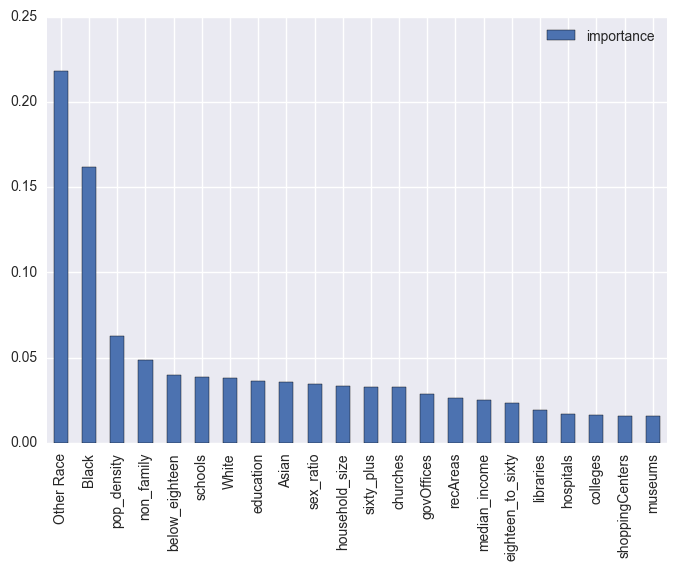

In [197]:
forest = RandomForestRegressor(n_estimators= 100, max_depth= 8, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

In [167]:
# split the data set into training and test sets
X = variables.loc[:,[i for i in variables.columns if not i in ["group_2","ZIP","Cluster0","Cluster1","Cluster2"]]]
Y = variables.loc[:,["group_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify = variables[['group_2']], test_size = 0.2, random_state=0)

In [216]:
from sklearn.metrics import f1_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    f1_score(y_true, y_pred, average='weighted') 
    # Return the score
    return score

In [200]:
# NOTE: THIS BLOCK TAKES ABOUT 30 MINUTES TO RUN!!!

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# create dictionaries of different parameters for our models
par_ada = {'n_estimators': [10, 20, 40, 100,150,200],'algorithm': ['SAMME', 'SAMME.R'],'learning_rate': [.5, 1, 1.5, 2],'random_state':[0]}
par_log = {'penalty':['l1','l2'],'random_state':[0]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11),'max_features': ['auto', 'sqrt', 'log2']}

# creating a model-parameter dictionary
model_par_clf = { 'AdaBoostClassifier()':par_ada,'LogisticRegression()':par_log, 
                 'RandomForestClassifier()':par_forest, 'DecisionTreeClassifier()':par_tree}


def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    
    #Create a regressor
    model = eval(model)

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(precision_score)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    
    # try different number of features using k-best method
    best_k = {}
    for i in range(5,20,3):
        k_best = SelectKBest(k=i)
        k_features = k_best.fit_transform(X, Y)
        

        # Fit the grid search object to the data to compute the optimal model
        grid = grid.fit(k_features, Y)
        best_k.update({i:grid.best_score_})
    
    max_k = max(best_k, key=lambda k: best_k[k])
    k_best = SelectKBest(k=max_k)
    k_features = k_best.fit_transform(X, Y)
    grid = grid.fit(k_features, Y)
    print "best k (number of features):",max_k
    # Return the optimal model after fitting the data
    return grid


best_models_clf = {}
for m in model_par_clf: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_clf)
    best_models_clf.update({m:best_model.best_estimator_})
    print "f1-score:",best_model.best_score_
    print "Best parameters",best_model.best_params_

RandomForestClassifier()
best k (number of features): 17
f1-score: 0.576345469544
Best parameters {'max_features': 'sqrt', 'n_estimators': 20, 'max_depth': 10}
DecisionTreeClassifier()
best k (number of features): 8
f1-score: 0.552443368547
Best parameters {'min_samples_split': 75, 'max_depth': 10}
AdaBoostClassifier()
best k (number of features): 14
f1-score: 0.57703564774
Best parameters {'n_estimators': 200, 'learning_rate': 1, 'random_state': 0, 'algorithm': 'SAMME'}
LogisticRegression()
best k (number of features): 14
f1-score: 0.489158531286
Best parameters {'penalty': 'l1', 'random_state': 0}


In [168]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf1 = RandomForestClassifier(max_features= 'sqrt', n_estimators= 20, max_depth= 10, random_state= 0)
#print "f1 score:",clf(clf3,14,X_test, y_test)[1]
k_best = SelectKBest(k=17)
k_features = k_best.fit_transform(X_train, y_train)
clf1.fit(k_features, y_train)

k_features = k_best.fit_transform(X_test, y_test)
y_pred = clf1.predict(k_features)
print "precision:",(precision_score(y_test, y_pred, average="macro"))
print "recall:",(recall_score(y_test, y_pred, average="macro"))
print "accuracy:",(accuracy_score(y_test, y_pred))

precision: 0.563106796117
recall: 0.55369928401
accuracy: 0.493793103448


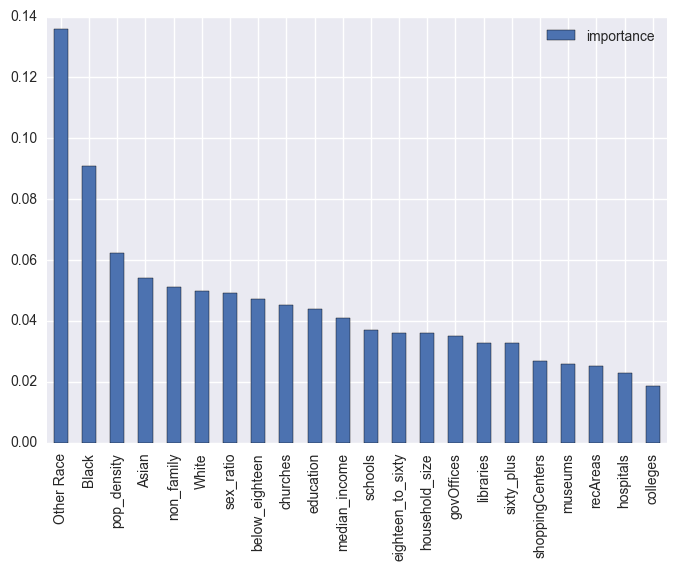

In [217]:
forest = clf1
forest.fit(X, Y)
importances = forest.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

In [215]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf2 = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state= 0, algorithm= 'SAMME')
#print "f1 score:",clf(clf3,14,X_test, y_test)[1]
k_best = SelectKBest(k=14)
k_features = k_best.fit_transform(X_train, y_train)
clf1.fit(k_features, y_train)

k_features = k_best.fit_transform(X_test, y_test)
y_pred = clf1.predict(k_features)
print "f1_score:",(f1_score(y_test, y_pred, average="macro"))
print "precision:",(precision_score(y_test, y_pred, average="macro"))
print "recall:",(recall_score(y_test, y_pred, average="macro"))
print "accuracy:",(accuracy_score(y_test, y_pred))

f1_score: 0.506493506494
precision: 0.418454935622
recall: 0.641447368421
accuracy: 0.475862068966


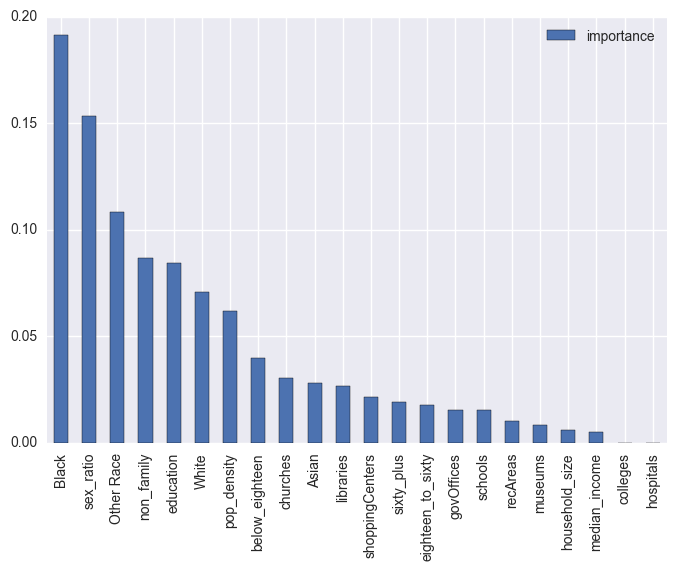

In [218]:
ada = clf2
ada.fit(X, Y)
importances = ada.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

In [220]:
# sensitivity test
def test(test_size,stratify,random_state, k_features): 
    '''tests the final classifier with a given test size, stratification option, and random_state '''
    k_features = k_features
    if stratify ==False: 
        X_train, X_test, y_train, y_test = train_test_split(k_features, Y['group_2'], test_size = test_size, random_state=random_state)
    else: 
        X_train, X_test, y_train, y_test = train_test_split(k_features, Y['group_2'], test_size = test_size,stratify = variables[['group_2']], random_state=random_state)
        
    clf_final = AdaBoostClassifier(n_estimators=200, learning_rate=1, random_state= 0, algorithm= 'SAMME')
    scores = cross_val_score(clf_final, X_train,y_train, cv=10, scoring = make_scorer(f1_score))
    scores_test = cross_val_score(clf_final, X_test,y_test, cv=2, scoring = make_scorer(f1_score)).mean()
    score_lst = list(scores)+[scores_test]
    df = pd.DataFrame(score_lst)
    df.columns = ["stratification = "+ str(stratify)]
    return df

In [221]:
# sensitivity tests for different test sizes and stratified and unstratified train-test splits

k_best = SelectKBest(k=14)
k_features = k_best.fit_transform(X, Y)
test_sizes = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
names = ['train'+str(i) for i in range(1,11)]+['test']


df_lst = []
for i in test_sizes: 
    for j in [False,True]:
        df = test(i,j,0,k_features)
        df_lst.append(df)
df = pd.concat(df_lst,axis = 1)
df['sets'] = names
df

,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,stratification = False,stratification = True,sets
0,0.587786,0.589212,0.573913,0.573840,0.558559,0.633929,0.547264,0.613208,0.601036,0.589474,0.689655,0.588889,0.588889,0.564706,0.679245,0.554839,train1
1,0.533333,0.570248,0.568966,0.614035,0.567686,0.599078,0.663636,0.672811,0.635514,0.604167,0.560440,0.491018,0.634731,0.592593,0.634146,0.546667,train2
2,0.634921,0.579592,0.658333,0.495238,0.646809,0.530233,0.568720,0.558824,0.577320,0.534031,0.546448,0.598930,0.585366,0.585635,0.547619,0.630872,train3
3,0.604839,0.578512,0.567686,0.631148,0.579186,0.592920,0.571429,0.582915,0.594872,0.525773,0.613757,0.622222,0.607735,0.538462,0.576687,0.537931,train4
4,0.583333,0.500000,0.572727,0.533333,0.592593,0.642857,0.606635,0.575758,0.602871,0.632653,0.568306,0.594286,0.576471,0.551282,0.658683,0.653846,train5
5,0.579832,0.593496,0.583691,0.573840,0.593886,0.511416,0.568627,0.590909,0.646766,0.542714,0.673367,0.540230,0.677778,0.552147,0.625767,0.556291,train6
6,0.626984,0.585551,0.614754,0.560669,0.635193,0.552995,0.613953,0.566038,0.574257,0.541667,0.566474,0.590674,0.487179,0.586826,0.547771,0.576923,train7
7,0.526786,0.575000,0.493023,0.584071,0.492462,0.583333,0.542714,0.518135,0.534031,0.583333,0.521277,0.563536,0.556213,0.607735,0.605263,0.588235,train8
8,0.574899,0.628788,0.578947,0.597510,0.581818,0.563636,0.604651,0.563107,0.597938,0.536842,0.595745,0.559140,0.540230,0.631579,0.518987,0.611465,train9
9,0.533865,0.617886,0.504202,0.584071,0.515021,0.595556,0.542056,0.535354,0.522167,0.569892,0.552083,0.595506,0.566845,0.550000,0.566265,0.588235,train10


# Finding clusters based on types of purchased foods instead of clientele

In [13]:
yelp_feats = yelp_feats.merge(yelp_atts[['Business_id','Name']], on = "Business_id") # merge to get the bussiness names
yelp_feats2 = yelp_feats.groupby("Name").sum() # aggregate by name

In [14]:
# calculating the TF-IDF for all columns
for i in yelp_feats2.columns: 
    idf = yelp_feats.shape[0]/(1+yelp_feats2[i].sum())
    yelp_feats2[i] *= idf

In [15]:
#add the generated features to the feature table
gen_feat_names = ['meat_types','vegie_types','hardliq_types','softliq_types','sweets_types','fast_food','latin_types',
                  'italian_types','asian_types','soda_types','seafood_types','ethnic_food']
gen_features = [meat_types,vegie_types,hardliq_types,softliq_types,sweets_types,fast_food,latin_types,
                  italian_types,asian_types,soda_types,seafood_types,ethnic_food]
for n,i in enumerate(gen_features):
    yelp_feats2[gen_feat_names[n]] = yelp_feats2[i].sum(axis=1)

In [16]:
yelp_norm = yelp_feats2 .div(yelp_feats2 .sum(axis=1)+1, axis=0)
yelp_norm = yelp_norm[gen_feat_names]

In [17]:
bus_use = yelp_revs2[['Business_id','Name']]
bus_use = bus_use.drop_duplicates(['Business_id'])
print bus_use.shape
freq_rests = bus_use.Name.value_counts().reset_index(name="count").query("count > 4")['index']
yelp_norm = yelp_norm[yelp_norm.index.isin(freq_rests)]
yelp_norm.shape

(6140, 2)


(114, 12)

In [18]:
yelp_norm.head()

,meat_types,vegie_types,hardliq_types,softliq_types,sweets_types,fast_food,latin_types,italian_types,asian_types,soda_types,seafood_types,ethnic_food
Name,,,,,,,,,,,,
5 & Diner,0.017761,0.059451,0.008089,0.000139,0.240256,0.117893,0.008907,0.016718,0.000496,0.016257,0.007011,0.007019
Applebee's,0.022713,0.097368,0.023237,0.021974,0.054370,0.049129,0.048114,0.031217,0.023433,0.021068,0.061791,0.045585
Arby's,0.024512,0.091582,0.019402,0.020473,0.057788,0.051842,0.046547,0.032383,0.024403,0.018078,0.064215,0.048775
Baja Fresh Mexican Grill,0.006658,0.074868,0.000000,0.000000,0.002446,0.015774,0.245127,0.000000,0.007127,0.014109,0.112839,0.021046
Barro's Pizza,0.012654,0.027718,0.000000,0.005150,0.035903,0.361382,0.003421,0.021575,0.000000,0.008350,0.007982,0.015855


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse
import sklearn.metrics.pairwise 
from numpy import genfromtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
from sklearn.utils.graph import graph_laplacian
from sklearn.utils.arpack import eigsh
from sklearn.manifold.spectral_embedding_ import _set_diag
import numpy as np


# calculate the pairwise similarity matrix
yelp_norm_mat = yelp_norm.as_matrix()
A_sparse = sparse.csr_matrix(yelp_norm_mat )
similarities = cosine_similarity(yelp_norm_mat)

sim_yelp= np.squeeze(np.asarray(similarities))


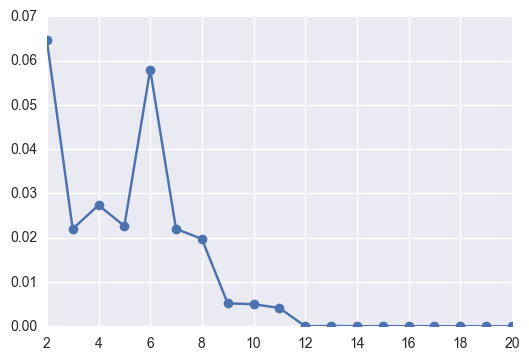

In [127]:
%matplotlib inline
normed_laplacian, dd = graph_laplacian (sim_yelp, normed=True, return_diag=True)
laplacian = _set_diag(normed_laplacian, 1)


n_components = sim_yelp.shape[0] - 1


eigenvalues, eigenvectors = eigsh(-laplacian, k=n_components, which="LM", sigma=1.0, maxiter=5000)
eigenvalues = -eigenvalues[::-1]  # Reverse and sign inversion.

max_gap = 0
gap_pre_index = 0
gaps = []
for i in range(1, eigenvalues.size):
        gap = eigenvalues[i] - eigenvalues[i - 1]
        gaps.append(gap)
        if gap > max_gap:
            max_gap = gap
            gap_pre_index = i - 1
            
k = gap_pre_index + 1
plt.plot(range(1, eigenvalues.size)[1:20], gaps[1:20], '-o')

In [20]:
from sklearn import cluster
n_clusters =3
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity='precomputed',
                                          assign_labels='discretize')

spectral.fit(similarities)
y_pred = spectral.fit_predict(similarities)

In [21]:
# attach the new clusters to the table
yelp_clusters = pd.read_csv("rest_clusters5.csv")
yelp_clusters['Food_clusters'] = list(y_pred)
yelp_clusters.head()

,Name,Cluster,Food_clusters
0,5 & Diner,0,2
1,Applebee's,0,0
2,Arby's,2,0
3,Baja Fresh Mexican Grill,0,0
4,Barro's Pizza,0,1


In [22]:
yelp_clusters.groupby('Food_clusters').count()

,Name,Cluster
Food_clusters,,
0,64,64
1,31,31
2,19,19


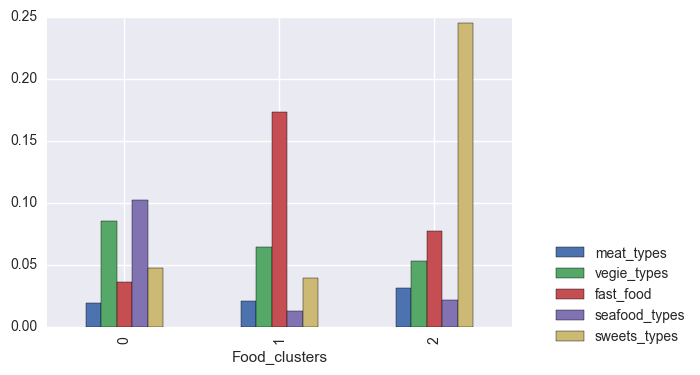

In [23]:
yelp_norm.reset_index(inplace=True)
yelp_norm = yelp_norm.merge(yelp_clusters, on = "Name")
food_cluster = yelp_norm.groupby("Food_clusters").mean()
%matplotlib inline
food_cluster[['meat_types','vegie_types', 'fast_food','seafood_types', 'sweets_types']].plot.bar().legend(bbox_to_anchor=(1.4, 0.3))

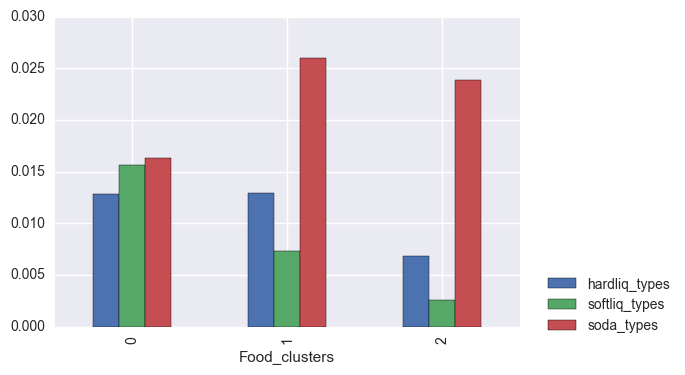

In [24]:
food_cluster[['hardliq_types','softliq_types','soda_types']].plot.bar().legend(bbox_to_anchor=(1.35, 0.2))

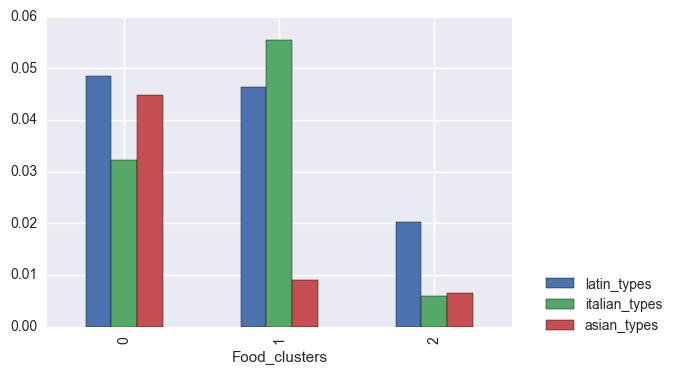

In [25]:
food_cluster[['latin_types','italian_types','asian_types']].plot.bar().legend(bbox_to_anchor=(1.35, 0.2))

In [26]:
yelp_atts = yelp_atts[['Business_id','Name']]
name_count = yelp_atts.groupby("Name").count()
name_count = name_count.reset_index()
name_count.columns = ['Name','Count']
yelp_clusters = yelp_clusters.merge(name_count, on = "Name")
yelp_clusters.columns = ['Name','Client_clusters','Food_clusters','Count']
yelp_clusters.head()

,Name,Client_clusters,Food_clusters,Count
0,5 & Diner,0,2,7
1,Applebee's,0,0,50
2,Arby's,2,0,63
3,Baja Fresh Mexican Grill,0,0,18
4,Barro's Pizza,0,1,40


In [27]:
def get_rest(clust_type,cluster,count):
    if clust_type =="client": a = yelp_clusters[yelp_clusters.Client_clusters==cluster]
    elif clust_type =="food": a = yelp_clusters[yelp_clusters.Food_clusters==cluster]
    else: 
        print "the first argument should be either 'food' or 'cient'" 
    a = a.sort(['Count'], ascending=False).head(count)
    a = a[['Name','Count']]
    name = "Names_"+"cluster_"+str(cluster)
    cnt = "Count_"+str(cluster)
    a.columns = [name,cnt]
    return a.reset_index()[[i for i in list(a.columns) if not i=="index"]]

In [28]:
pd.concat([get_rest("food",0,10),get_rest("food",1,10),get_rest("food",2,10)], axis= 1)

C:\Users\sur216\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Names_cluster_0,Count_0,Names_cluster_1,Count_1,Names_cluster_2,Count_2
0,Subway,364,Del Taco,60,Dairy Queen,45
1,McDonald's,345,Roberto's Taco Shop,44,IHOP,40
2,Taco Bell,180,Panera Bread,44,Carl's Jr.,34
3,Pizza Hut,155,Capriotti's Sandwich Shop,41,Church's Chicken,28
4,Burger King,147,Carl's Jr,41,Popeyes,25
5,Wendy's,144,Barro's Pizza,40,Culver's,25
6,Panda Express,119,Little Caesars Pizza,37,Waffle House,24
7,Domino's Pizza,97,Rosati's Pizza,36,Fatburger,22
8,Chipotle Mexican Grill,95,PT's,33,Village Inn,19
9,Jimmy John's,95,Quiznos,32,Whataburger,19


In [29]:
yelp_clusters.to_csv("food_client_clusters.csv", index=False)

In [156]:
yelp_clusters.head()

,Name,Client_clusters,Food_clusters,Count
0,5 & Diner,0,1,7
1,Applebee's,0,0,50
2,Arby's,2,0,63
3,Baja Fresh Mexican Grill,0,0,18
4,Barro's Pizza,0,2,40


# Classification and regression for food-based clusters

In [30]:
path2 = "YellowPages/yellowpages_zipcode_maindata.csv"
yellow_zip = pd.read_csv(path2)

# remove those restaurants with zip codes = NA
yellow_zip = yellow_zip[np.isfinite(yellow_zip['ZCTA5CE10'])]

# convert zip codes to standard 5 digits format
yellow_zip['ZCTA5CE10'] = yellow_zip['ZCTA5CE10'].astype(int).apply(lambda x:'%05d' % x) 


yelp_clusters["Name"] = yelp_clusters["Name"].apply(lambda x:x.lower())
yellow_zip["Name"] = yellow_zip["Name"].apply(lambda x:x.lower())
yellow_zip = yellow_zip.merge(yelp_clusters, on = "Name")
print yellow_zip.shape

rest_count_clnt = yellow_zip.groupby(["ZCTA5CE10","Food_clusters"]).count()
rest_count_clnt = rest_count_clnt.iloc[:,[0]]
rest_count_clnt.reset_index(inplace = True)
rest_count_clnt.columns = ['ZIP','cluster','count']
rest_count_clnt.head()

(124933, 28)


,ZIP,cluster,count
0,01001,0,4
1,01002,0,3
2,01005,0,1
3,01007,0,3
4,01008,0,1


In [158]:
total_cnt = rest_count_clnt.groupby('ZIP').sum()
total_cnt.reset_index(inplace=True)
total_cnt = total_cnt[['ZIP','count']]
total_cnt.columns = ['ZIP','Total_cnt']
rest_count_clnt=rest_count_clnt.merge(total_cnt, on ='ZIP')
rest_count_clnt.head()

,ZIP,cluster,count,Total_cnt
0,01001,0,4,4
1,01002,0,3,3
2,01005,0,1,1
3,01007,0,3,3
4,01008,0,1,1


In [159]:
rest_count_clnt =rest_count_clnt[rest_count_clnt['Total_cnt']>9]

# we can now see the total count of restaurants per zip code
# and the count of specific clusters per zip code

# we can now calculate the proportion of each cluster per zip code
# in the first row for example, 19 percent of restaurants in zipcode 01020 are in cluster 0
rest_count_clnt['cclst_proportion'] = rest_count_clnt['count']/rest_count_clnt.Total_cnt

# if we pivot the table above, for every zip code, we can see 
# what are the proportions of the four clusters

respose_variables= rest_count_clnt.pivot(index='ZIP', columns='cluster', values='cclst_proportion').fillna(0)
respose_variables.reset_index(inplace = True)
respose_variables.columns = ['ZIP',"Cluster0","Cluster1","Cluster2"]

In [160]:
rest_count_clnt.ZIP.unique().shape

(4622L,)

In [161]:
respose_variables.head()

,ZIP,Cluster0,Cluster1,Cluster2
0,01020,0.857143,0.047619,0.095238
1,01035,0.833333,0.083333,0.083333
2,01040,0.869565,0.043478,0.086957
3,01060,0.900000,0.100000,0.000000
4,01085,0.875000,0.000000,0.125000


In [162]:
# merge independent and response variables on zip code
all_vars = all_joined.merge(respose_variables, on = "ZIP")
all_vars.head()

,ZIP,churches,colleges,govOffices,hospitals,libraries,museums,recAreas,schools,shoppingCenters,...,eighteen_to_sixty,household_size,non_family,median_income,education,pop_density,sex_ratio,Cluster0,Cluster1,Cluster2
0,01020,0.045230,0.000000,0.035538,0.003231,0.006461,0.000000,0.003231,0.041999,0.000000,...,56.598165,0.007948,15.003392,40536,17.399444,0.095805,0.999419,0.857143,0.047619,0.095238
1,01035,0.075117,0.000000,0.056338,0.000000,0.000000,0.037559,0.000000,0.037559,0.037559,...,50.990423,0.042254,17.953052,40390,46.391362,0.008905,0.718296,0.833333,0.083333,0.083333
2,01040,0.042139,0.002479,0.037181,0.007436,0.002479,0.022309,0.009915,0.064447,0.004957,...,56.698585,0.006321,13.905758,32230,23.399425,0.073257,0.942462,0.869565,0.043478,0.086957
3,01060,0.039396,0.013132,0.111622,0.006566,0.019698,0.065660,0.006566,0.118188,0.000000,...,66.195666,0.013132,26.139199,NaN,60.296060,0.053852,0.692410,0.900000,0.100000,0.000000
4,01085,0.036136,0.002409,0.028909,0.004818,0.009636,0.002409,0.007227,0.060226,0.002409,...,58.298603,0.006191,12.503011,41180,32.699205,0.026843,0.952585,0.875000,0.000000,0.125000


(3625, 26)


(    number of clusters  silhouette_score
 0                    2          0.377708
 1                    3          0.367789
 2                    4          0.325393
 3                    5          0.331813
 4                    6          0.337918
 5                    7          0.339198
 6                    8          0.352537
 7                    9          0.329230
 8                   10          0.361258
 9                   11          0.358377
 10                  12          0.361247
 11                  13          0.370693
 12                  14          0.375425,
 <matplotlib.axes._subplots.AxesSubplot at 0xb2d73400>)

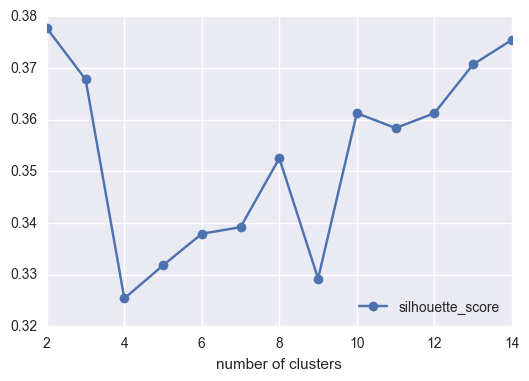

In [163]:
variables = all_vars.dropna(how='any')
print variables.shape
X = variables.loc[:,[i for i in variables.columns if not i in ["ZIP","Cluster0","Cluster1","Cluster2"]]]
Y = variables.loc[:,["Cluster0","Cluster1","Cluster2"]]


def multi_clusterer(lst,Y):
    score_results = []
    for n in lst: 
        kmeans = KMeans(n_clusters=n, random_state=0).fit(Y)
        preds = kmeans.predict(Y)
        score_results.append([n,silhouette_score(Y,preds)])
    df = pd.DataFrame(score_results)
    df.columns = ['number of clusters', 'silhouette_score']
    return df, df.plot(x='number of clusters', y = 'silhouette_score', style = '-o')


multi_clusterer(range(2,15),Y)

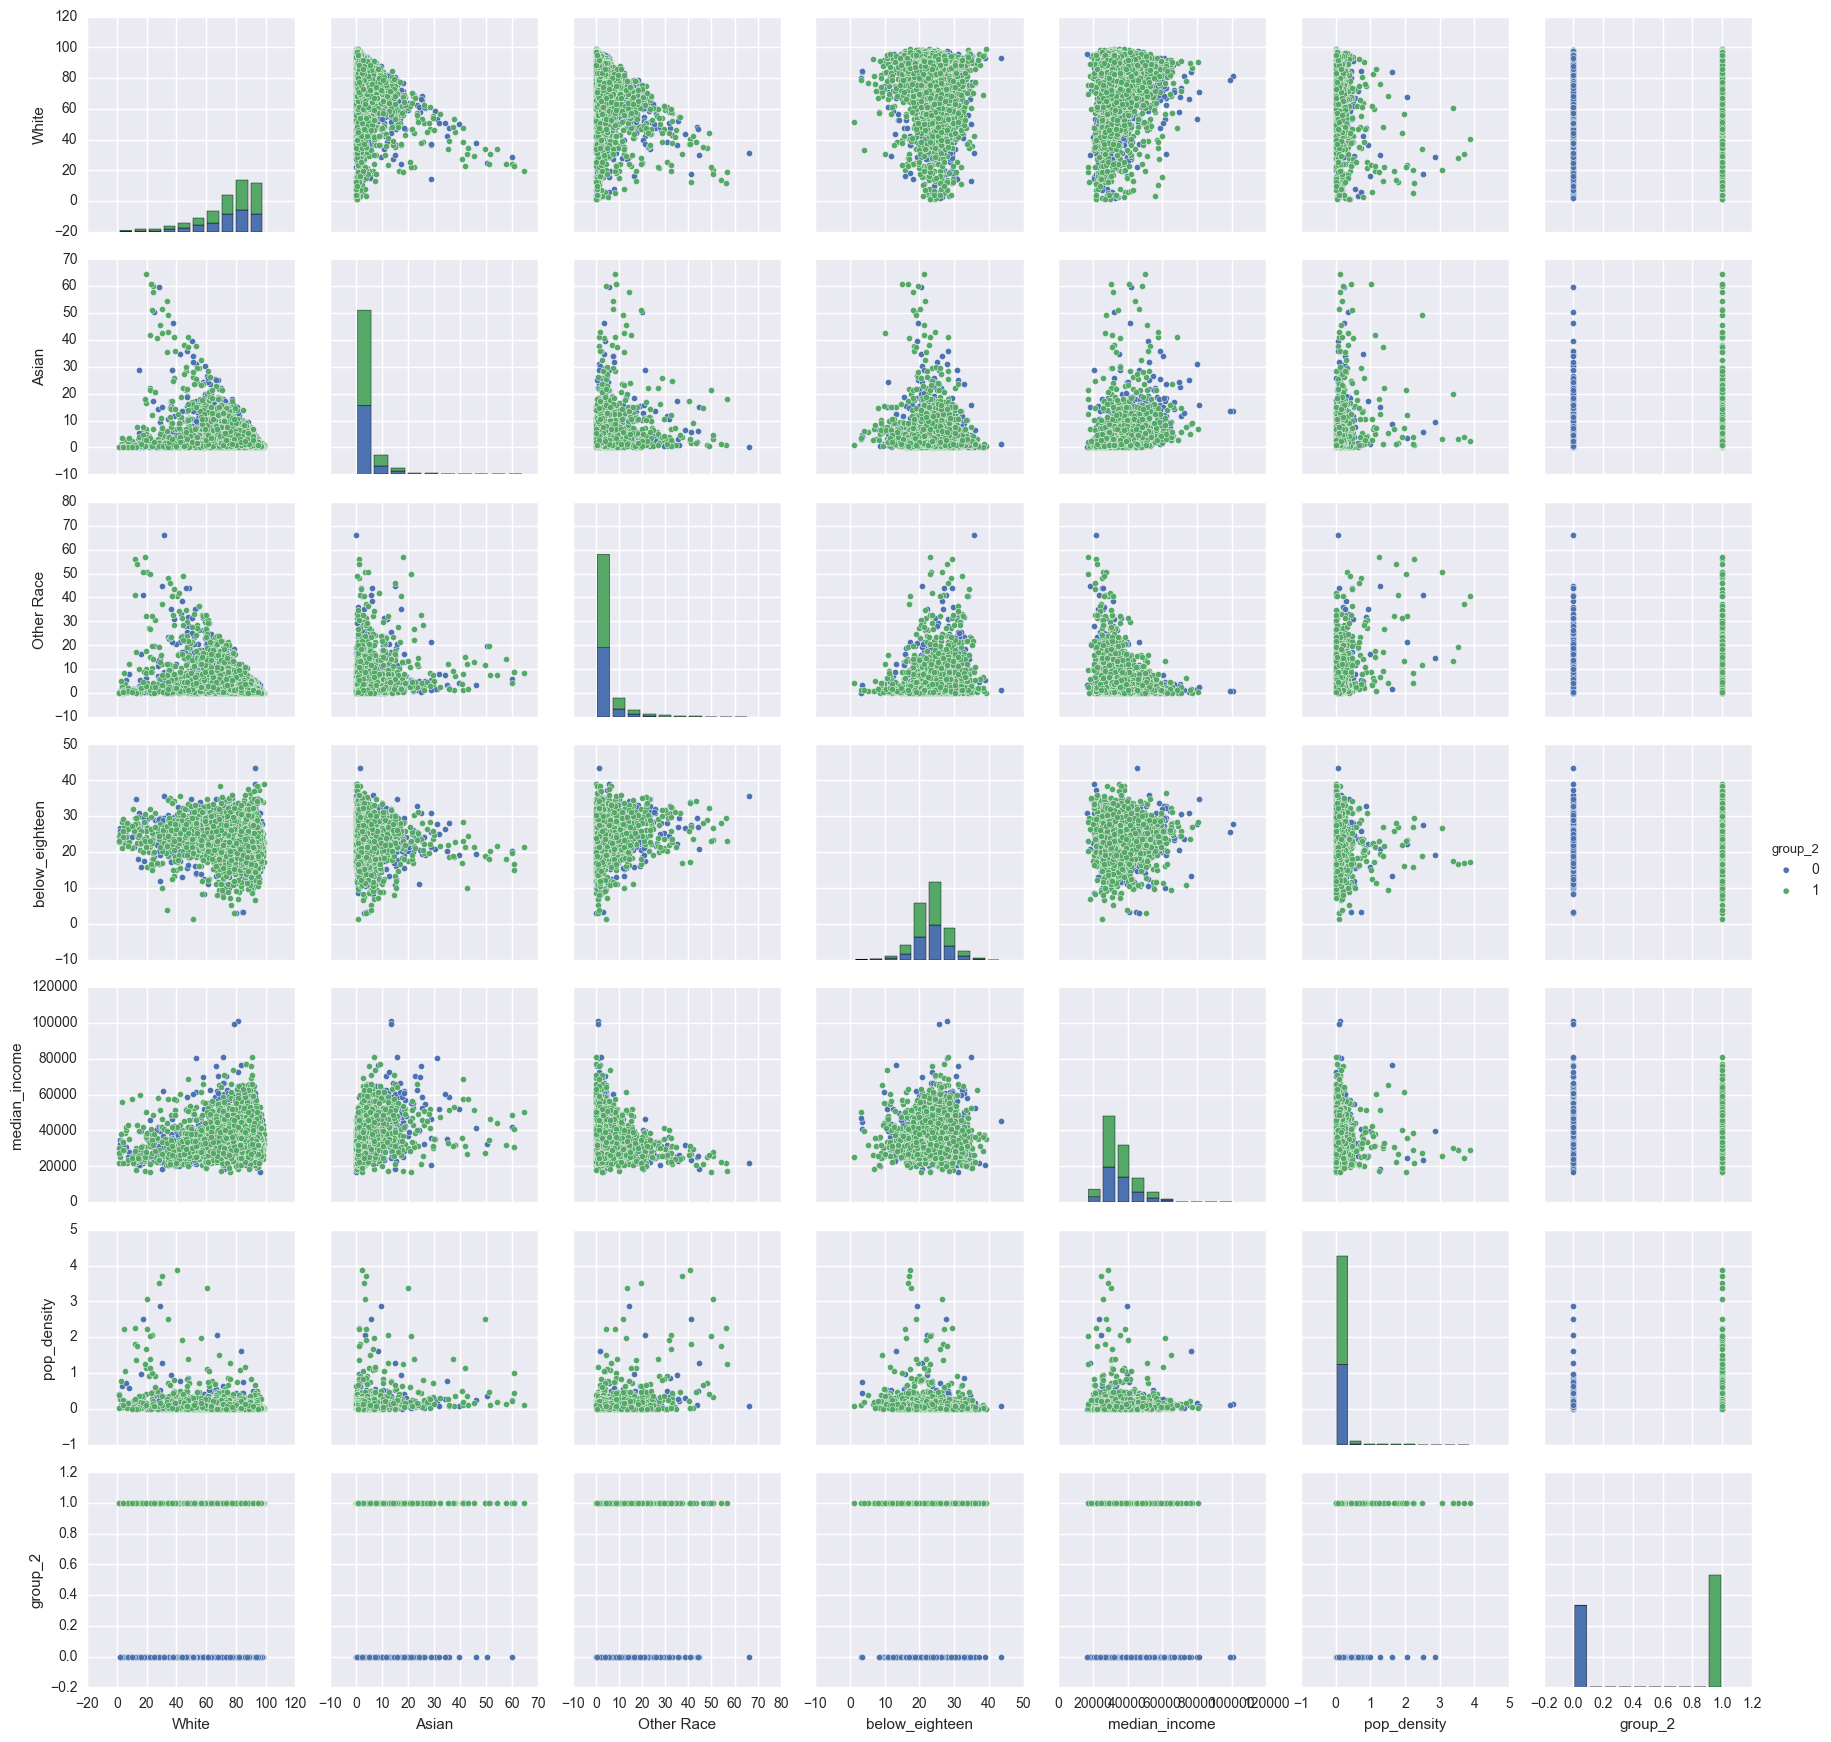

In [164]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)
variables['group_2'] = map(int, kmeans.labels_)

#pairplot for some variables
list_of_vars = ['White', 'Asian', 'Other Race', 'below_eighteen', 'median_income', 'pop_density', 'group_2']
df = variables[list_of_vars]
for i in list_of_vars: 
    if not i == "group_2":df[i]= pd.to_numeric(df[i])
sns.pairplot(df, hue = "group_2")

In [165]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify = variables[['group_2']], test_size = 0.2, random_state=0)


# define the performance metric
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    score =r2_score(y_true, y_predict) 
    # Return the score
    return score




# create dictionaries of different parameters for our models
par_lin = {'fit_intercept':[True,False],'normalize':[True,False]}
par_laso = {'alpha':[0,0.1,0.2,0.5,1], 'fit_intercept':[True,False], 'normalize':[True,False]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11)}

# creating a model-parameter dictionary
model_par_reg ={'linear_model.LinearRegression()':par_lin,
          'linear_model.Lasso()':par_laso,
          'DecisionTreeRegressor()':par_tree,
           'RandomForestRegressor()':par_forest}

def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    #Create a regressor
    model = eval(model)
    
    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, Y)

    # Return the optimal model after fitting the data
    return grid

best_models = {}
for m in model_par_reg: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_reg)
    best_models.update({m:best_model.best_estimator_})
    print "R-square:",best_model.best_score_
    print "Best parameters",best_model.best_params_

linear_model.Lasso()
R-square: 0.0258093773878
Best parameters {'normalize': True, 'alpha': 0, 'fit_intercept': True}
RandomForestRegressor()
R-square: 0.0500537257048
Best parameters {'n_estimators': 100, 'max_depth': 8}
linear_model.LinearRegression()
R-square: 0.0258094771854
Best parameters {'normalize': True, 'fit_intercept': False}
DecisionTreeRegressor()
R-square: 0.0179436038517
Best parameters {'min_samples_split': 55, 'max_depth': 2}


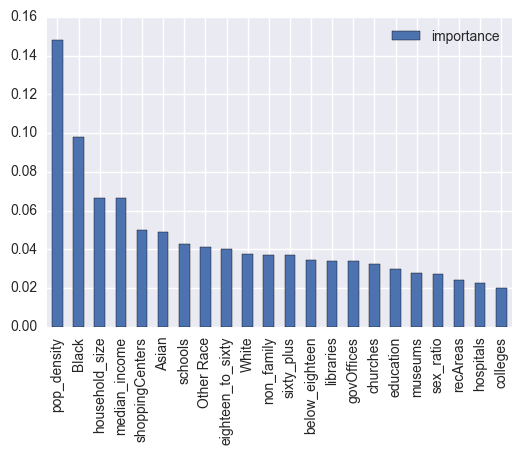

In [145]:
forest = RandomForestRegressor(n_estimators= 50, max_depth= 7, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

In [175]:
X = variables.loc[:,[i for i in variables.columns if not i in ["group_2","ZIP","Cluster0","Cluster1","Cluster2"]]]
Y = variables.loc[:,["group_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify = variables[['group_2']], test_size = 0.2, random_state=0)

In [100]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier





def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    f1_score(y_true, y_pred, average='weighted') 
    # Return the score
    return score


# NOTE: THIS BLOCK TAKES ABOUT 30 MINUTES TO RUN!!!


# create dictionaries of different parameters for our models
par_ada = {'n_estimators': [10, 20, 40, 100,150,200],'algorithm': ['SAMME', 'SAMME.R'],'learning_rate': [.5, 1, 1.5, 2],'random_state':[0]}
par_log = {'penalty':['l1','l2'],'random_state':[0]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11),'max_features': ['auto', 'sqrt', 'log2']}

# creating a model-parameter dictionary
model_par_clf = { 'AdaBoostClassifier()':par_ada,'LogisticRegression()':par_log, 
                 'RandomForestClassifier()':par_forest, 'DecisionTreeClassifier()':par_tree}

def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    
    #Create a regressor
    model = eval(model)

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(f1_score)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    
    # try different number of features using k-best method
    best_k = {}
    for i in range(5,20,3):
        k_best = SelectKBest(k=i)
        k_features = k_best.fit_transform(X, Y)
        

        # Fit the grid search object to the data to compute the optimal model
        grid = grid.fit(k_features, Y)
        best_k.update({i:grid.best_score_})
    
    max_k = max(best_k, key=lambda k: best_k[k])
    k_best = SelectKBest(k=max_k)
    k_features = k_best.fit_transform(X, Y)
    grid = grid.fit(k_features, Y)
    print "best k (number of features):",max_k
    # Return the optimal model after fitting the data
    return grid

best_models_clf = {}
for m in model_par_clf: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_clf)
    best_models_clf.update({m:best_model.best_estimator_})
    print "f1-score:",best_model.best_score_
    print "Best parameters",best_model.best_params_

RandomForestClassifier()
best k (number of features): 8
f1-score: 0.725282161569
Best parameters {'max_features': 'log2', 'n_estimators': 50, 'max_depth': 1}
DecisionTreeClassifier()
best k (number of features): 8
f1-score: 0.72504154395
Best parameters {'min_samples_split': 5, 'max_depth': 1}
AdaBoostClassifier()
best k (number of features): 8
f1-score: 0.716530437666
Best parameters {'n_estimators': 10, 'learning_rate': 0.5, 'random_state': 0, 'algorithm': 'SAMME'}
LogisticRegression()
best k (number of features): 8
f1-score: 0.711520821543
Best parameters {'penalty': 'l1', 'random_state': 0}


In [176]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf1 = RandomForestClassifier(max_features= 'log2', n_estimators= 50, max_depth= 1, random_state= 0)
#print "f1 score:",clf(clf3,14,X_test, y_test)[1]
k_best = SelectKBest(k=8)
k_features = k_best.fit_transform(X_train, y_train)
clf1.fit(k_features, y_train)

k_features = k_best.fit_transform(X_test, y_test)
y_pred = clf1.predict(k_features)
print "f1_score:",(f1_score(y_test, y_pred, average="macro"))
print "precision:",(precision_score(y_test, y_pred, average="macro"))
print "recall:",(recall_score(y_test, y_pred, average="macro"))
print "accuracy:",(accuracy_score(y_test, y_pred))

f1_score: 0.732517482517
precision: 0.577931034483
recall: 1.0
accuracy: 0.577931034483


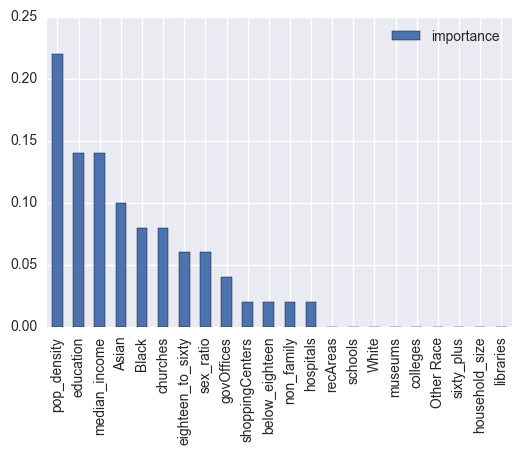

In [105]:
forest = clf1
forest.fit(X, Y)
importances = forest.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

In [181]:
# sensitivity test
def test(test_size,stratify,random_state, k_features): 
    '''tests the final classifier with a given test size, stratification option, and random_state '''
    k_features = k_features
    if stratify ==False: 
        X_train, X_test, y_train, y_test = train_test_split(k_features, Y['group_2'], test_size = test_size, random_state=random_state)
    else: 
        X_train, X_test, y_train, y_test = train_test_split(k_features, Y['group_2'], test_size = test_size,stratify = variables[['group_2']], random_state=random_state)
        
    clf_final = RandomForestClassifier(max_features= 'log2', n_estimators= 50, max_depth= 1, random_state= 0)
    scores = cross_val_score(clf_final, X_train,y_train, cv=10, scoring = make_scorer(f1_score))
    scores_test = cross_val_score(clf_final, X_test,y_test, cv=2, scoring = make_scorer(f1_score)).mean()
    score_lst = list(scores)+[scores_test]
    df = pd.DataFrame(score_lst)
    df.columns = ["stratification = "+ str(stratify)+"test size: "+str(test_size)]
    return df

In [182]:
k_best = SelectKBest(k=14)
k_features = k_best.fit_transform(X, Y)
test_sizes = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]
names = ['train'+str(i) for i in range(1,11)]+['test']


df_lst = []
for i in test_sizes: 
    
    for j in [False,True]:
        df = test(i,j,0,k_features)
        df_lst.append(df)
df = pd.concat(df_lst,axis = 1)
df['sets'] = names
df

,stratification = Falsetest size: 0.1,stratification = Truetest size: 0.1,stratification = Falsetest size: 0.15,stratification = Truetest size: 0.15,stratification = Falsetest size: 0.2,stratification = Truetest size: 0.2,stratification = Falsetest size: 0.25,stratification = Truetest size: 0.25,stratification = Falsetest size: 0.3,stratification = Truetest size: 0.3,stratification = Falsetest size: 0.35,stratification = Truetest size: 0.35,stratification = Falsetest size: 0.4,stratification = Truetest size: 0.4,stratification = Falsetest size: 0.45,stratification = Truetest size: 0.45,sets
0,0.731141,0.732558,0.731006,0.733607,0.726477,0.732026,0.725995,0.733179,0.725000,0.733167,0.725806,0.732620,0.725146,0.732558,0.722045,0.734177,train1
1,0.731518,0.732558,0.731006,0.733607,0.726477,0.732026,0.725995,0.733179,0.726817,0.733167,0.725806,0.732620,0.725146,0.732558,0.722045,0.734177,train2
2,0.731518,0.732558,0.729897,0.732510,0.726477,0.733624,0.725995,0.731935,0.726817,0.733167,0.725806,0.732620,0.725146,0.732558,0.722045,0.734177,train3
3,0.731518,0.732558,0.729897,0.732510,0.726477,0.733624,0.725995,0.731935,0.726817,0.733167,0.726287,0.733154,0.725146,0.732558,0.722045,0.732484,train4
4,0.731518,0.732558,0.729897,0.732510,0.728070,0.733624,0.725995,0.731935,0.726817,0.733167,0.726287,0.733154,0.725146,0.732558,0.722045,0.732484,train5
5,0.731518,0.733981,0.729897,0.732510,0.728070,0.733624,0.725995,0.731935,0.726817,0.733167,0.726287,0.733154,0.725146,0.732558,0.722045,0.732484,train6
6,0.731518,0.733981,0.729897,0.732510,0.726872,0.733624,0.725995,0.733645,0.725441,0.733167,0.726287,0.733154,0.723529,0.732558,0.724359,0.732484,train7
7,0.731518,0.732943,0.729897,0.732510,0.726872,0.733624,0.725995,0.733645,0.725441,0.733167,0.726287,0.733154,0.723529,0.734694,0.718447,0.732484,train8
8,0.731518,0.732943,0.729897,0.732510,0.726872,0.732456,0.724706,0.733645,0.725441,0.731830,0.726287,0.733154,0.723529,0.733138,0.722581,0.732484,train9
9,0.731518,0.732943,0.731405,0.734021,0.726872,0.732456,0.724706,0.733645,0.725441,0.733668,0.726287,0.733154,0.725664,0.733138,0.722581,0.732484,train10


In [109]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


X = variables.loc[:,[i for i in variables.columns if not i in ["group_2","ZIP","Cluster0","Cluster1","Cluster2"]]]
Y = variables.loc[:,["group_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify = variables[['group_2']], test_size = 0.2, random_state=0)


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """   
    #Calculate the performance score between 'y_true' and 'y_predict'
    f1_score(y_true, y_pred, average='weighted') 
    # Return the score
    return score


# NOTE: THIS BLOCK TAKES ABOUT 30 MINUTES TO RUN!!!


# create dictionaries of different parameters for our models
par_ada = {'n_estimators': [10, 20, 40, 100,150,200],'algorithm': ['SAMME', 'SAMME.R'],'learning_rate': [.5, 1, 1.5, 2],'random_state':[0]}
par_log = {'penalty':['l1','l2'],'random_state':[0]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11),'max_features': ['auto', 'sqrt', 'log2']}

# creating a model-parameter dictionary
model_par_clf = { 'AdaBoostClassifier()':par_ada,'LogisticRegression()':par_log, 
                 'RandomForestClassifier()':par_forest, 'DecisionTreeClassifier()':par_tree}

def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    
    #Create a regressor
    model = eval(model)

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(accuracy_score)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    
    # try different number of features using k-best method
    best_k = {}
    for i in range(5,20,3):
        k_best = SelectKBest(k=i)
        k_features = k_best.fit_transform(X, Y)
        

        # Fit the grid search object to the data to compute the optimal model
        grid = grid.fit(k_features, Y)
        best_k.update({i:grid.best_score_})
    
    max_k = max(best_k, key=lambda k: best_k[k])
    k_best = SelectKBest(k=max_k)
    k_features = k_best.fit_transform(X, Y)
    grid = grid.fit(k_features, Y)
    print "best k (number of features):",max_k
    # Return the optimal model after fitting the data
    return grid

best_models_clf = {}
for m in model_par_clf: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_clf)
    best_models_clf.update({m:best_model.best_estimator_})
    print "f1-score:",best_model.best_score_
    print "Best parameters",best_model.best_params_

RandomForestClassifier()
best k (number of features): 17
f1-score: 0.607068965517
Best parameters {'max_features': 'sqrt', 'n_estimators': 100, 'max_depth': 8}
DecisionTreeClassifier()
best k (number of features): 8
f1-score: 0.58775862069
Best parameters {'min_samples_split': 95, 'max_depth': 4}
AdaBoostClassifier()
best k (number of features): 14
f1-score: 0.60724137931
Best parameters {'n_estimators': 40, 'learning_rate': 0.5, 'random_state': 0, 'algorithm': 'SAMME.R'}
LogisticRegression()
best k (number of features): 17
f1-score: 0.59724137931
Best parameters {'penalty': 'l1', 'random_state': 0}


In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf1 = RandomForestClassifier(max_features= 'sqrt', n_estimators= 100, max_depth= 8, random_state= 0)
#print "f1 score:",clf(clf3,14,X_test, y_test)[1]
k_best = SelectKBest(k=17)
k_features = k_best.fit_transform(X_train, y_train)
clf1.fit(k_features, y_train)

k_features = k_best.fit_transform(X_test, y_test)
y_pred = clf1.predict(k_features)
print "f1_score:",(f1_score(y_test, y_pred, average="macro"))
print "precision:",(precision_score(y_test, y_pred, average="macro"))
print "recall:",(recall_score(y_test, y_pred, average="macro"))
print "accuracy:",(accuracy_score(y_test, y_pred))

f1_score: 0.684989429175
precision: 0.605607476636
recall: 0.788321167883
accuracy: 0.588965517241


In [113]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

clf2 = AdaBoostClassifier(n_estimators= 40, learning_rate= 0.5, random_state= 0, algorithm= 'SAMME.R')
#print "f1 score:",clf(clf3,14,X_test, y_test)[1]
k_best = SelectKBest(k=14)
k_features = k_best.fit_transform(X_train, y_train)
clf2.fit(k_features, y_train)

k_features = k_best.fit_transform(X_test, y_test)
y_pred = clf2.predict(k_features)
print "f1_score:",(f1_score(y_test, y_pred, average="macro"))
print "precision:",(precision_score(y_test, y_pred, average="macro"))
print "recall:",(recall_score(y_test, y_pred, average="macro"))
print "accuracy:",(accuracy_score(y_test, y_pred))

f1_score: 0.539440203562
precision: 0.565333333333
recall: 0.515815085158
accuracy: 0.500689655172


# Another regression model on Clientele clusters using only 2 clusters

In [142]:
# One reason for having low R-square is the number of response variables 
# we can reduce the number of clusters that we created in the first place
# to remedy this to some extet

from sklearn import cluster
n_clusters =2
spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                          eigen_solver='arpack',
                                          affinity='precomputed',
                                          assign_labels='discretize')

spectral.fit(similarities)
y_pred = spectral.fit_predict(similarities)

# now we make a data frame with restaurant names in one columns and their cluster in another
name_cluster = pd.DataFrame(zip(rest_names, y_pred))
name_cluster.columns = ['Name','Cluster']


# Save the clustering results
name_cluster.to_csv("rest_clusters6.csv", index = False)

name_cluster.head()

,Name,Cluster
0,5 & Diner,0
1,Applebee's,0
2,Arby's,1
3,Baja Fresh Mexican Grill,0
4,Barro's Pizza,0


In [150]:
path2 = "YellowPages/yellowpages_zipcode_maindata.csv"
yellow_zip = pd.read_csv(path2)

name_cluster["Name"] = name_cluster["Name"].apply(lambda x:x.lower())
yellow_zip["Name"] = yellow_zip["Name"].apply(lambda x:x.lower())
yellow_zip = yellow_zip.merge(name_cluster, on = "Name")

rest_count_clnt = yellow_zip.groupby(["ZCTA5CE10","Cluster"]).count()
rest_count_clnt = rest_count_clnt.iloc[:,[0]]
rest_count_clnt.reset_index(inplace = True)
rest_count_clnt.columns = ['ZIP','cluster','count']

# calculate the total count of restaurants per zip code
rest_cnt = yellow_zip.groupby(["ZCTA5CE10"]).count()
rest_cnt.reset_index(inplace = True)
rest_cnt = rest_cnt.iloc[:,[0,1]]
rest_cnt.columns = ['ZIP',"Total_cnt"]


# merging the total counts with the previous table
rest_count_clnt = rest_count_clnt.merge(rest_cnt, on = "ZIP")
rest_count_clnt =rest_count_clnt[rest_count_clnt['Total_cnt']>9]

# we can now see the total count of restaurants per zip code
# and the count of specific clusters per zip code

# we can now calculate the proportion of each cluster per zip code
# in the first row for example, 19 percent of restaurants in zipcode 01020 are in cluster 0
rest_count_clnt['cclst_proportion'] = rest_count_clnt['count']/rest_count_clnt.Total_cnt


respose_variables= rest_count_clnt.pivot(index='ZIP', columns='cluster', values='cclst_proportion').fillna(0)
respose_variables.reset_index(inplace = True)
respose_variables.columns = ['ZIP',"Cluster0","Cluster1"]

respose_variables.ZIP = respose_variables.ZIP.apply(pd.to_numeric, errors='coerce')
respose_variables['ZIP'] = respose_variables['ZIP'].astype(int).apply(lambda x:'%05d' % x) 
respose_variables.head()

,ZIP,Cluster0,Cluster1
0,01020,0.571429,0.428571
1,01035,0.666667,0.333333
2,01040,0.739130,0.260870
3,01060,0.700000,0.300000
4,01085,0.687500,0.312500


In [216]:
all_vars = all_joined.merge(respose_variables, on = "ZIP")
variables = all_vars.dropna(how='any')

X = variables.loc[:,[i for i in variables.columns if not i in ["ZIP","Cluster0","Cluster1"]]]
Y = variables.loc[:,["Cluster0","Cluster1"]]

# split the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# create dictionaries of different parameters for our models
par_lin = {'fit_intercept':[True,False],'normalize':[True,False]}
par_laso = {'alpha':[0,0.1,0.2,0.5,1], 'fit_intercept':[True,False], 'normalize':[True,False]}
par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11)}

# creating a model-parameter dictionary
model_par_reg ={'linear_model.LinearRegression()':par_lin,
          'linear_model.Lasso()':par_laso,
          'DecisionTreeRegressor()':par_tree,
           'RandomForestRegressor()':par_forest}

def fit_model(X, Y, model,par_dict):
    """ Performs grid search over a model with different parameters """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    #Create a dictionary for the parameters
    params = par_dict.get(model)
    
    #Create a regressor
    model = eval(model)
    
    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(model, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, Y)

    # Return the optimal model after fitting the data
    return grid

best_models = {}
for m in model_par_reg: 
    print m
    best_model = fit_model(X_train, y_train, m,model_par_reg)
    best_models.update({m:best_model.best_estimator_})
    print "R-square:",best_model.best_score_
    print "Best parameters",best_model.best_params_

linear_model.Lasso()
R-square: 0.127290288094
Best parameters {'normalize': False, 'alpha': 0, 'fit_intercept': True}
RandomForestRegressor()
R-square: 0.197663892883
Best parameters {'n_estimators': 100, 'max_depth': 10}
linear_model.LinearRegression()
R-square: 0.127288274348
Best parameters {'normalize': True, 'fit_intercept': False}
DecisionTreeRegressor()
R-square: 0.11870697394
Best parameters {'min_samples_split': 15, 'max_depth': 4}


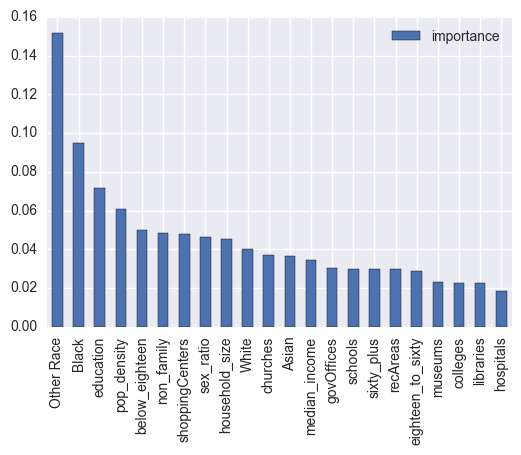

In [218]:
forest = RandomForestRegressor(n_estimators= 100, max_depth= 10, random_state=0)
forest.fit(X, Y)
importances = forest.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)

# limiting the analysis to certain states

In [156]:
import pandas as pd
import numpy as np

path2 = "YellowPages/yellowpages_zipcode_maindata.csv"
yellow_zip = pd.read_csv(path2)
yellow_zip = yellow_zip[np.isfinite(yellow_zip['ZCTA5CE10'])]
yellow_zip.ZCTA5CE10 = yellow_zip.ZCTA5CE10.apply(pd.to_numeric, errors='coerce')
yellow_zip['ZCTA5CE10'] = yellow_zip['ZCTA5CE10'].astype(int).apply(lambda x:'%05d' % x) 

In [155]:
def get_state(state):
    '''gets a state name and returns the part of all_variables data frame that are in that state
    all_variables is the data frame including both response variables and independent variables'''
    df = yellow_zip[yellow_zip.State==state]
    zips = df.ZCTA5CE10.unique()
    df2 = all_vars[all_vars['ZIP'].isin(zips)]
    return df2

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import silhouette_score 
from sklearn.feature_selection import SelectKBest
from pandas import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

def reg_state(state):
    variables = get_state(state)
    variables = variables.dropna(how='any')

    X = variables.loc[:,[i for i in variables.columns if not i in ["ZIP","Cluster0","Cluster1"]]]
    Y = variables.loc[:,["Cluster0","Cluster1"]]

    # split the data set into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

   

    # create dictionaries of different parameters for our models
    par_lin = {'fit_intercept':[True,False],'normalize':[True,False]}
    par_laso = {'alpha':[0,0.1,0.2,0.5,1], 'fit_intercept':[True,False], 'normalize':[True,False]}
    par_tree = {'min_samples_split' : range(5,100,10), 'max_depth': range(1,11)}
    par_forest =  {'n_estimators': [10,20,50,100], 'max_depth':range(1,11)}

    # creating a model-parameter dictionary
    model_par_reg ={'linear_model.LinearRegression()':par_lin,
          'linear_model.Lasso()':par_laso,
          'DecisionTreeRegressor()':par_tree,
           'RandomForestRegressor()':par_forest}
    
    best_scores = {}
    best_models = {}
    for m in model_par_reg: 
        print m
        best_model = fit_model(X_train, y_train, m,model_par_reg)
        best_models.update({m:best_model.best_estimator_})
        best_scores.update({m:best_model.best_score_})
        print "R-square:",best_model.best_score_
        print "Best parameters",best_model.best_params_
    print max(best_scores, key=lambda k: best_scores[k])
    return best_models.get(max(best_scores, key=lambda k: best_scores[k]))

linear_model.Lasso()
R-square: 0.0671062028423
Best parameters {'normalize': False, 'alpha': 0, 'fit_intercept': True}
RandomForestRegressor()
R-square: 0.200982021262
Best parameters {'n_estimators': 100, 'max_depth': 4}
linear_model.LinearRegression()
R-square: 0.0671015117251
Best parameters {'normalize': True, 'fit_intercept': False}
DecisionTreeRegressor()
R-square: 0.0615651136481
Best parameters {'min_samples_split': 45, 'max_depth': 3}
RandomForestRegressor()


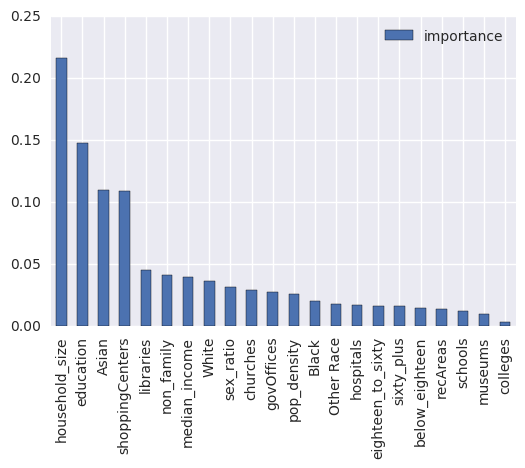

In [165]:
variables = get_state("TX")
variables = variables.dropna(how='any')

X = variables.loc[:,[i for i in variables.columns if not i in ["ZIP","Cluster0","Cluster1"]]]
Y = variables.loc[:,["Cluster0","Cluster1"]]

%matplotlib inline
model = reg_state("TX")
model.fit(X, Y)
importances = model.feature_importances_
importances = pd.DataFrame(zip(list(X.columns),importances))
importances.columns = ['factor', 'importance']
importances = importances.sort('importance',ascending=False)
ax = importances.plot(kind = 'bar',xticks=importances.index, rot=90)
ax.set_xticklabels(importances.factor)